
## DAV 6150 -  Module 7 Assignemnt:

**Group Members:** Lucia Shumba, Chidochashe Makanga, Bekithemba Nkomo,  Alwyn Munatsi  
**Deliverables:** Jupyter notebook (code + narrative)

---
### Contents
1. Introduction  
2. Exploratory Data Analysis (EDA)  
3. Data Preparation (cleaning + feature engineering)  
4. Post‑Prep EDA (sanity checks)  
5. Regression Modeling (Binomial Logistic) + Coefficient Interpretation  
6. Model Selection (cross‑validation, preferred model)   
7. Conclusions


# 1. Introduction
## Business Context and Domain Knowledge

The insurance industry operates in a highly competitive environment where maintaining and expanding relationships with existing customers is essential for sustainable growth. Unlike acquiring new customers, cross-selling—offering additional products to current clients—allows insurance firms to increase customer lifetime value while reducing marketing and acquisition costs.

For example:

* A customer with home insurance might be offered auto or life insurance.

* A customer with auto insurance could be targeted for roadside assistance or extended warranty products.

Understanding which customers are most likely to purchase an additional insurance product can help companies optimize marketing campaigns, allocate resources efficiently, and improve retention rates.

## Problem Statement

The task is to develop a binary classification model (Logistic Regression) that predicts whether a customer (TARGET) will buy a new insurance product. The model will use features describing customer demographics, loyalty level, product purchase history, and financial behavior.

## Dataset Description

The dataset (from Kaggle: Insurance Company Dataset
) contains over 14,000 records, each representing a customer. Key features include:

* TARGET (Purchased new product (0 = No, 1 = Yes),	Binary, Response variable)
* Loyalty	(Loyalty level (0–3, 99 = unclassified), Categorical,	Treat 99 as missing/unclassified)
* Age, Age_p	(Customer and partner age,	Numerical	Continuous)
* City	(City code	Categorical (even if numeric)	High cardinality)
* LOR, LOR_m	(Length of relationship (years/months),	Numerical	Continuous but correlated)
* Prod_A, Prod_B	(Whether the customer bought product A or B,	Binary,	Categorical)
* Type_A, Type_B, Contract	(Type/category of products or contracts,	Categorical)
* Turnover_A, Turnover_B	(Amount spent on product A and B,	Numerical	Continuous
Approach)

The project will follow these structured steps:

#### 1. Exploratory Data Analysis (EDA):
  * Univariate and bivariate analysis.
  * Identify missing values, outliers, and data distributions.
  * Detect categorical vs. continuous features.


#### 2. Data Preparation:

* Handle missing or unclassified values.

* Encode categorical variables.

* Scale/normalize continuous variables.

#### 3. Feature Selection:

* Correlation analysis, variance thresholds, and model-based selection.

#### 4. Model Development:

* Train and compare at least three Logistic Regression models.

#### 5. Model Evaluation:

* Use metrics such as accuracy, F1-score, and ROC-AUC.

* Select the best model based on interpretability and performance.

#### 6. Conclusions:

* Summarize key findings and actionable business insights.


## 2) Exploratory Data Analysis
We check integrity (shape, missingness, duplicates), the distribution of the target (`TARGET`), and basic subgroup composition.

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/bnkomo-creator/DAV-6150/refs/heads/main/M7_Data.csv")

In [3]:
# Print the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape}")

# Print the number of rows in a formatted way
print(f"Number of rows: {df.shape[0]:,}")

# Print the number of columns
print(f"Number of columns: {df.shape[1]}")

# Display the first 5 rows of the DataFrame to get a glimpse of the data
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display information about the DataFrame, including data types and non-null values
print("\nDataset info:")
display(df.info())

Dataset shape: (14016, 15)
Number of rows: 14,016
Number of columns: 15

First 5 rows of the dataset:


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


None

Based on this initial exploration, we can observe the following about the dataset:

*   **Shape:** The dataset has 14,016 rows and 15 columns.
*   **First 5 Rows:** The head of the DataFrame shows the first few entries, giving us a preview of the data structure and the types of values present in each column, including `TARGET`, `loyalty`, `ID`, `age`, `city`, `LOR`, `prod_A`, `type_A`, `type_B`, `prod_B`, `turnover_A`, `turnover_B`, `contract`, `age_P`, and `lor_M`.
*   **Dataset Info:** The `df.info()` output provides a summary of the DataFrame's structure:
    *   There are 14,016 entries in total.
    *   The columns have varying data types, including `object` (for `TARGET`), `int64` (for most columns), and `float64` (for `turnover_A` and `turnover_B`).
    *   All columns have 14016 non-null entries, indicating that there are no missing values in this initial view of the data.

This initial look confirms the dimensions of the dataset and provides an overview of the data types and completeness of each column.

In [4]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check if there are any missing values
print("Missing values:", df.isna().sum().sum())


Duplicate rows: 3008
Missing values: 0


*   **Duplicate Rows:** There are 3008 duplicate rows in the dataset. These duplicate entries should be investigated and handled appropriately depending on the context of the data.
*   **Missing Values:** There are no missing values in the dataset as indicated by the total count of 0.

This initial check highlights the presence of a significant number of duplicate rows which will need to be addressed in the data preparation phase, while confirming that there are no missing values that require imputation or removal at this stage.

## 2.1 Univariate Analysis




Value counts for '	TARGET':


TARGET
N    8000
Y    6016
Name: count, dtype: int64


Summary statistics for 'TARGET':


count     14016
unique        2
top           N
freq       8000
Name: TARGET, dtype: object

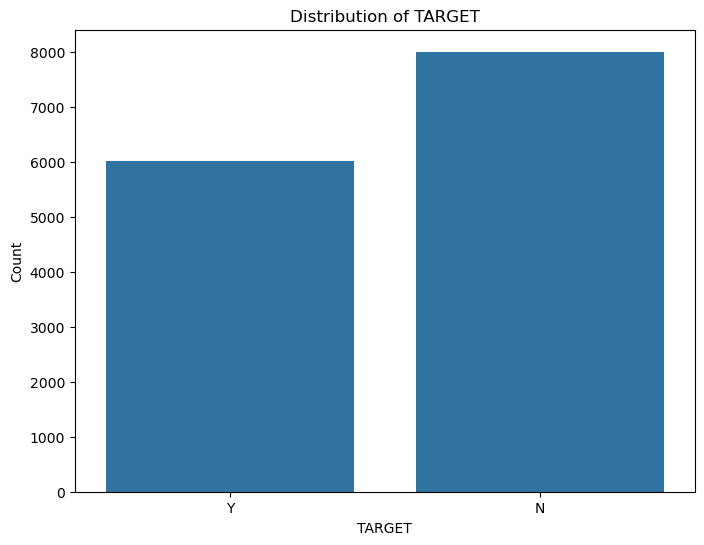

In [5]:
# EDA for col TARGET
print("\nValue counts for '	TARGET':")
display(df['TARGET'].value_counts())

print("\nSummary statistics for 'TARGET':")
display(df['TARGET'].describe())

#Visualize the distribution of aggregation index
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TARGET')
plt.title('Distribution of TARGET')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

Based on the analysis of the **TARGET** column:

*   **Value Counts:** The dataset contains two unique values for the TARGET variable: 'N' and 'Y'. 'N' appears 8000 times, and 'Y' appears 6016 times.
*   **Summary Statistics:** The TARGET column is of object type and has 14016 non-null entries. There are two unique values, with 'N' being the most frequent (8000 times).
*   **Distribution:** The countplot visually represents the distribution, showing that there are more instances of 'N' than 'Y' in the dataset.

This indicates that 'N' is the majority class in this dataset.


Value counts for 'loyalty':


loyalty
99    6986
3     3069
1     2480
2     1425
0       56
Name: count, dtype: int64

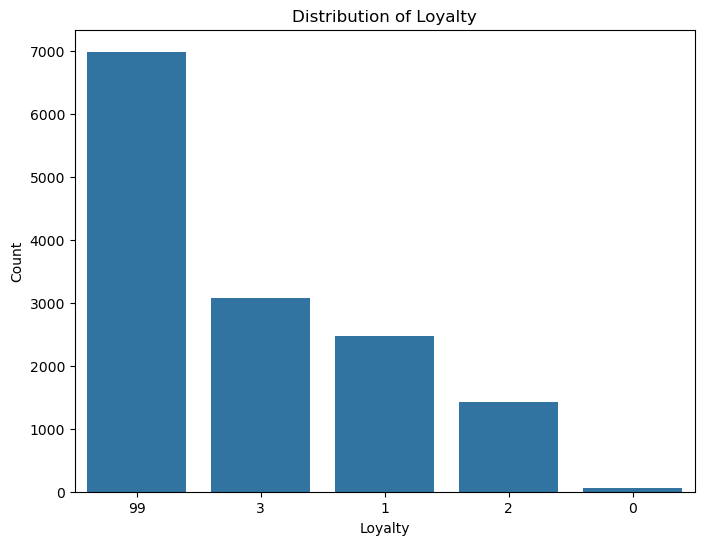

In [6]:
# EDA for loyalty
print("\nValue counts for 'loyalty':")
display(df['loyalty'].value_counts())

#Visualize the distribution of loyalty
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loyalty', order = df['loyalty'].value_counts().index)
plt.title('Distribution of Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.show()

Based on the analysis of the **loyalty** column, we can see that:

*   The dataset contains five unique values for the `loyalty` variable: 99, 3, 1, 2, and 0.
*  value 99 is the most frequent, with 6986 entries.
*  value 3 is the second most frequent, with 3069 entries.
*  value 1 is the third most frequent, with 2480 entries.
*  value 2 has 1425 entries.
*  value 0 is the least frequent, with 56 entries.

This indicates that the majority of the data comes from entries with a `loyalty` value of 99. The distribution suggests varying levels of loyalty among the entries in the dataset.


Description of 'age':


count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age, dtype: float64

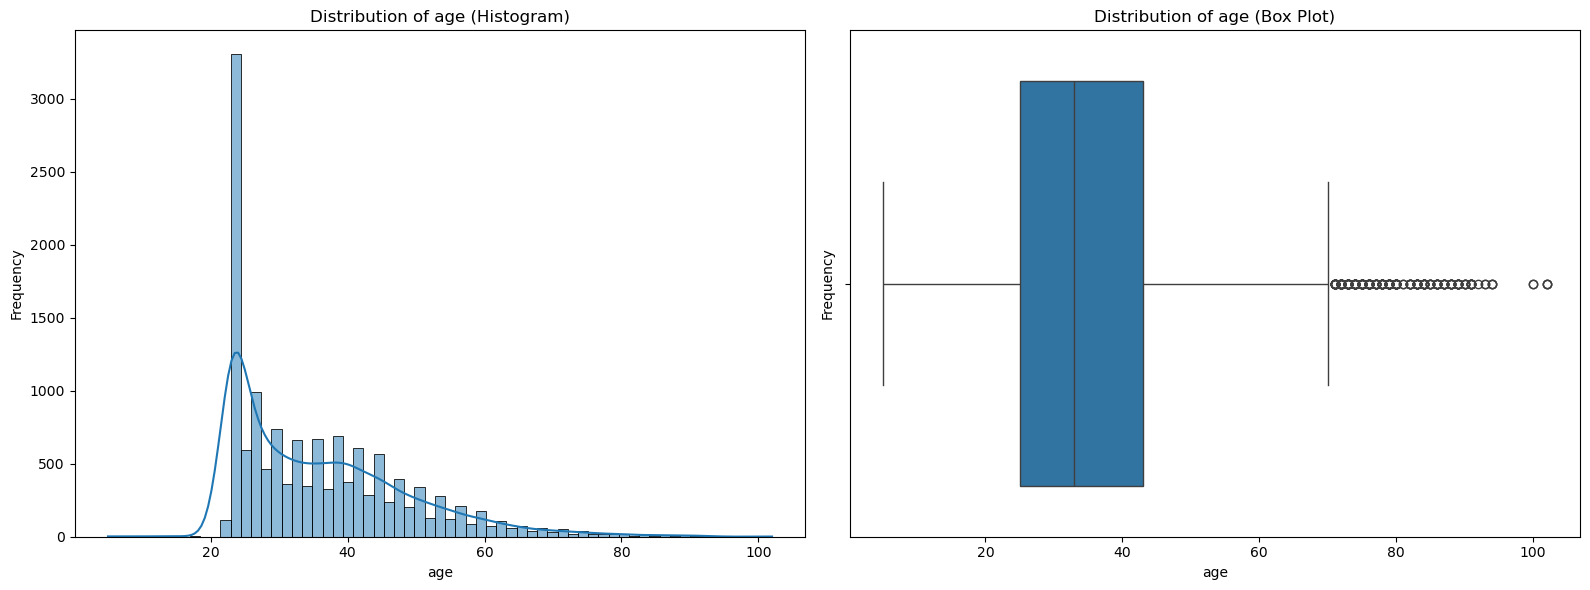

In [7]:
# EDA for Age
# Display basic statistics
print("\nDescription of 'age':")
display(df['age'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='age', ax=axes[0], kde=True)
axes[0].set_title('Distribution of age (Histogram)')
axes[0].set_xlabel('age')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='age', ax=axes[1])
axes[1].set_title('Distribution of age (Box Plot)')
axes[1].set_xlabel('age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the analysis of the **age** column and its potential use as a predictor in a binary logistic regression model:

*   **Distribution:** The histogram and box plot show that the 'age' column is right-skewed, meaning there are more entries with younger ages and fewer with older ages. There are also some outliers on the higher end of the age spectrum.
*   **Range and Variability:** The descriptive statistics indicate a wide range of ages (from 5 to 102) with a standard deviation of approximately 12.97, suggesting considerable variability in age within the dataset.
*   **Relevance for Modeling:** Age is often a significant factor in predicting various outcomes, and it's plausible that age could be a relevant predictor for your target variable in a binary logistic regression model. However, the right-skewness and outliers might influence the model's performance.

**Considerations for Modeling:**

*   **Skewness and Outliers:** The skewness and outliers in the 'age' column could potentially violate some assumptions of logistic regression or disproportionately influence the model's coefficients. You might consider data transformation techniques (e.g., log transformation) to address the skewness or outlier treatment strategies (e.g., capping or removing outliers) if necessary.
*   **Linearity Assumption:** Logistic regression assumes a linear relationship between the independent variables (including 'age') and the log-odds of the dependent variable. You might want to visually inspect this relationship or consider including polynomial terms or splines for age if the relationship is non-linear.


Value counts for 'city':


city
2      13720
1         28
0         26
8         21
9         20
       ...  
235        1
161        1
197        1
23         1
30         1
Name: count, Length: 65, dtype: int64

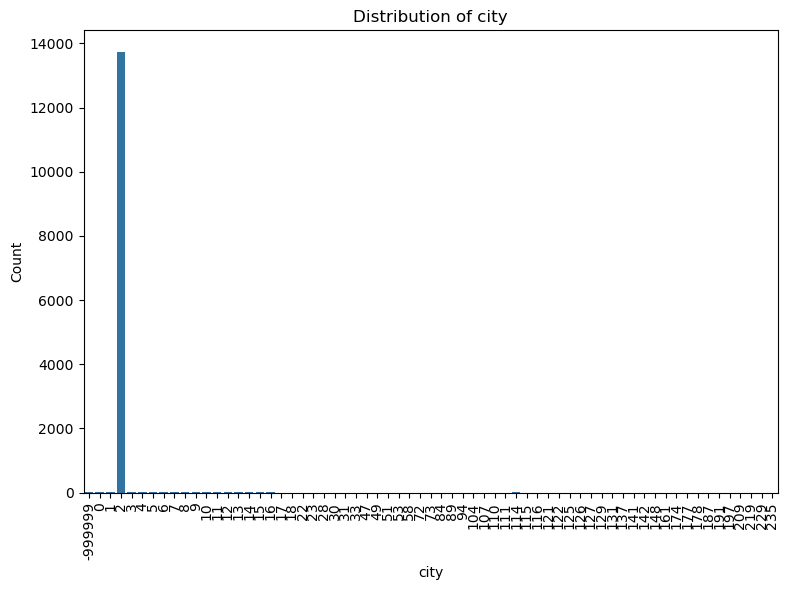

In [8]:
# EDA for city
print("\nValue counts for 'city':")
display(df['city'].value_counts())

#Visualize the data for city column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='city')
plt.title('Distribution of city')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Based on the analysis of the **city** column, we can see that:

*   The dataset contains data for 65 unique cities.
*   City code '2' is by far the most frequent, with 13,720 entries.
*   Other cities have significantly fewer entries, with many having only one or a few entries.

This indicates that the dataset is heavily dominated by data from city '2', while the data from other cities is much sparser. This imbalance in city representation could be an important consideration for any analysis or modeling that uses the 'city' column.


Description of 'LOR':


count    14016.000000
mean         0.926299
std          0.965212
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: LOR, dtype: float64

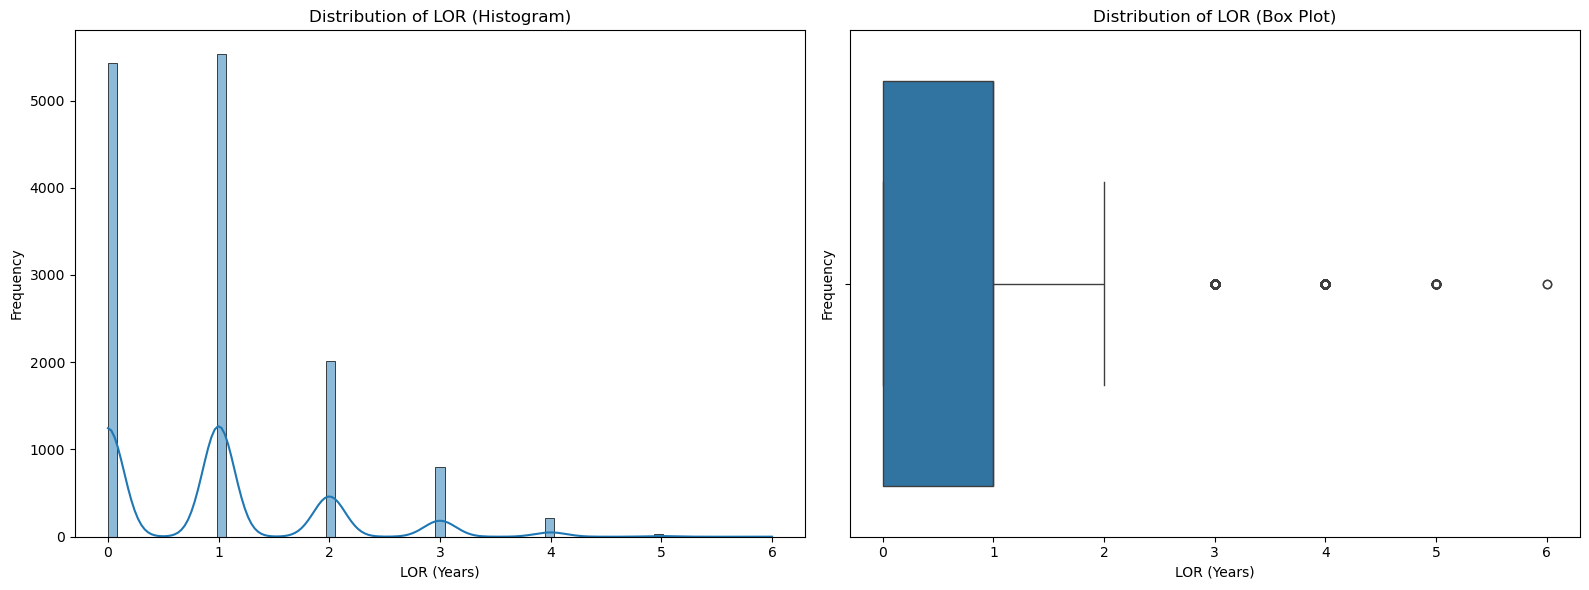

In [9]:
# EDA for LOR in years
# Display basic statistics
print("\nDescription of 'LOR':")
display(df['LOR'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df, x='LOR', ax=axes[0], kde=True)
axes[0].set_title('Distribution of LOR (Histogram)')
axes[0].set_xlabel('LOR (Years)')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='LOR', ax=axes[1])
axes[1].set_title('Distribution of LOR (Box Plot)')
axes[1].set_xlabel('LOR (Years)')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Based on the analysis of the **LOR** column, we can see that:

*   **Distribution:** The histogram and box plot show that the 'LOR' column is heavily skewed to the right, with a large concentration of values at 0 and 1, and a long tail extending to higher values.
*   **Range and Variability:** The descriptive statistics show a range from 0 to 6. The mean is about 0.93 and the median is 1. The standard deviation is about 0.97, indicating some variability, but the majority of values are quite low.
*   **Outliers:** The box plot indicates the presence of outliers at the higher end of the 'LOR' values.

This suggests that most entries have a low 'LOR' value, with a few entries having significantly higher values. This skewness and the presence of outliers should be considered if using 'LOR' as a predictor in a model.


Value counts for 'prod_A':


prod_A
1    7482
0    6534
Name: count, dtype: int64

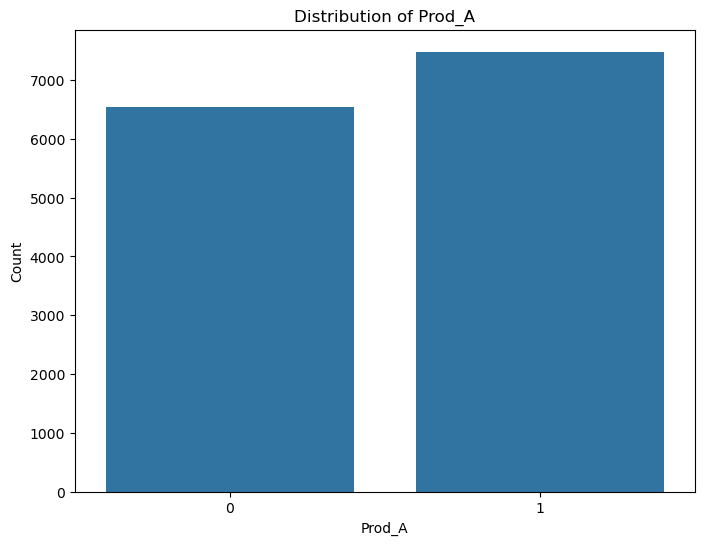

In [10]:
# EDA for prod_A
print("\nValue counts for 'prod_A':")
display(df['prod_A'].value_counts())

#Visualize data for prod_A column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='prod_A')
plt.title('Distribution of Prod_A')
plt.xlabel('Prod_A')
plt.ylabel('Count')
plt.show()

Based on the analysis of the **prod_A** column, we can see that:

*   The dataset contains two unique values for the `prod_A` variable: 1 and 0.
*   **Interpretation:** In this column, a value of **0 indicates a customer did not buy Product A**, and a value of **1 indicates a customer did buy Product A**.
*   `prod_A` value 1 (bought Product A) is the most frequent, with 7482 entries.
*   `prod_A` value 0 (did not buy Product A) is the second most frequent, with 6534 entries.

This indicates that there is a relatively even distribution between customers who bought Product A and those who did not, with slightly more customers having bought the product.


Value counts for 'type_A':


type_A
3    7452
0    6534
6      30
Name: count, dtype: int64

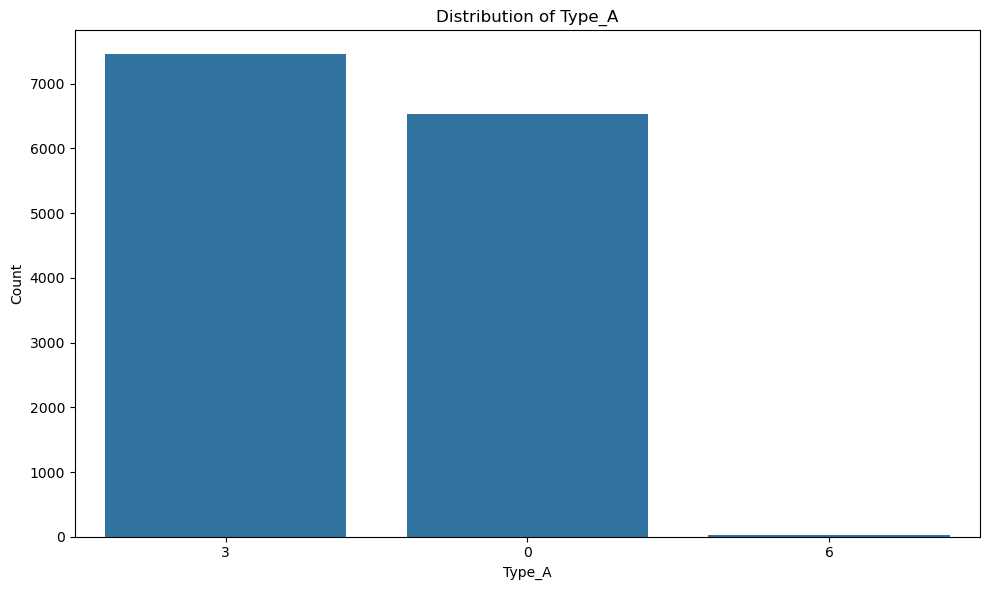

In [11]:
# EDA for type_A
print("\nValue counts for 'type_A':")
display(df['type_A'].value_counts())

# Visualize the type_A column
plt.figure(figsize=(10, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='type_A', order = df['type_A'].value_counts().index)
plt.title('Distribution of Type_A')
plt.xlabel('Type_A')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the analysis of the **type_A** column, we can see that:

*   The dataset contains three unique values for the `type_A` variable: 3, 0, and 6.
*   `type_A` value 3 is the most frequent, with 7452 entries.
*   `type_A` value 0 is the second most frequent, with 6534 entries.
*   `type_A` value 6 is the least frequent, with only 30 entries.

This indicates that the most common `type_A` is 3, followed by 0, with a significantly smaller number of entries for type 6.


Value counts for 'type_B':


type_B
3    7874
0    5614
6     493
9      35
Name: count, dtype: int64

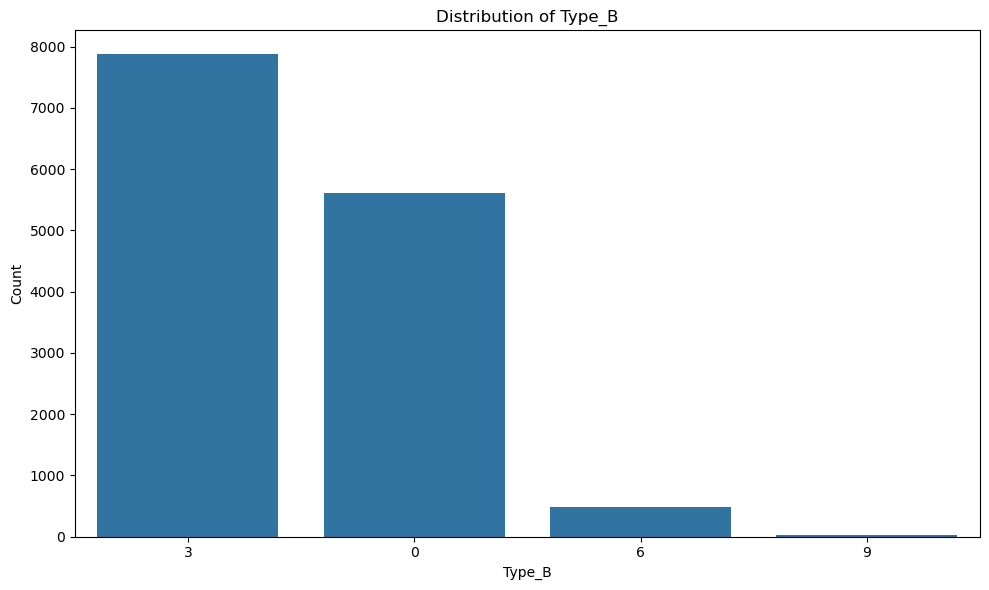

In [12]:
# EDA for type_B
print("\nValue counts for 'type_B':")
display(df['type_B'].value_counts())

# Visualize the type_B column
plt.figure(figsize=(10, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='type_B', order = df['type_B'].value_counts().index)
plt.title('Distribution of Type_B')
plt.xlabel('Type_B')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the analysis of the **type_B** column, we can see that:

*   The dataset contains four unique values for the `type_B` variable: 3, 0, 6, and 9.
*   `type_B` value 3 is the most frequent, with 7874 entries.
*   `type_B` value 0 is the second most frequent, with 5614 entries.
*   `type_B` value 6 has 493 entries.
*   `type_B` value 9 is the least frequent, with only 35 entries.

This indicates that the most common `type_B` is 3, followed by 0, with significantly fewer entries for types 6 and 9.


Value counts for 'prod_B':


prod_B
1    8402
0    5614
Name: count, dtype: int64

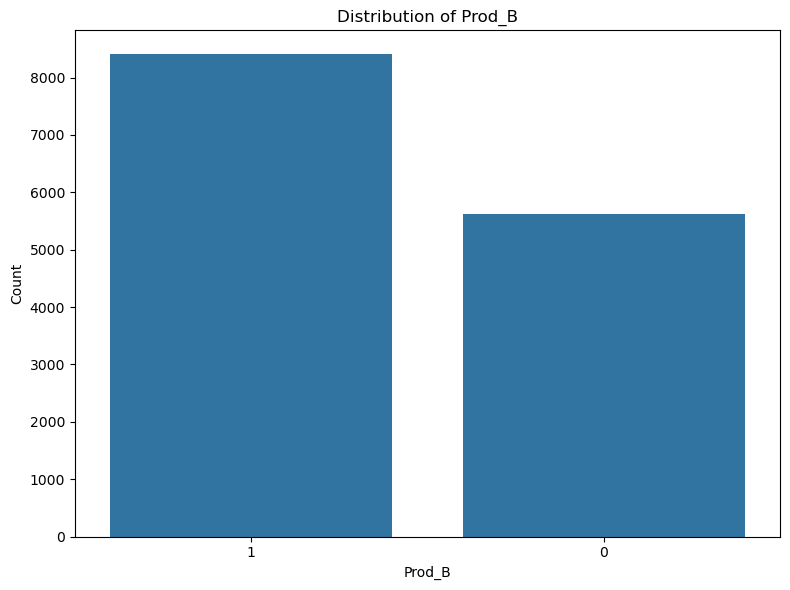

In [13]:
# EDA for prod_B
print("\nValue counts for 'prod_B':")
display(df['prod_B'].value_counts())

# Visualize data for prod_B column
plt.figure(figsize=(8, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='prod_B', order=df['prod_B'].value_counts().index)
plt.title('Distribution of Prod_B')
plt.xlabel('Prod_B')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the analysis of the **prod_B** column, we can see that:

*   The dataset contains two unique values for the `prod_B` variable: 1 and 0.
*   **Interpretation:** In this column, a value of **0 indicates a customer did not buy Product B**, and a value of **1 indicates a customer did buy Product B**.
*   `prod_B` value 1 (bought Product B) is the most frequent, with 8402 entries.
*   `prod_B` value 0 (did not buy Product B) is the second most frequent, with 5614 entries.

This indicates that there is a relatively even distribution between customers who bought Product B and those who did not, with slightly more entries having a value of 1.


Description of 'turnover_A':


count    14016.000000
mean       379.161320
std         92.612207
min        300.095909
25%        334.919412
50%        367.891493
75%        399.744924
max       5568.784139
Name: turnover_A, dtype: float64

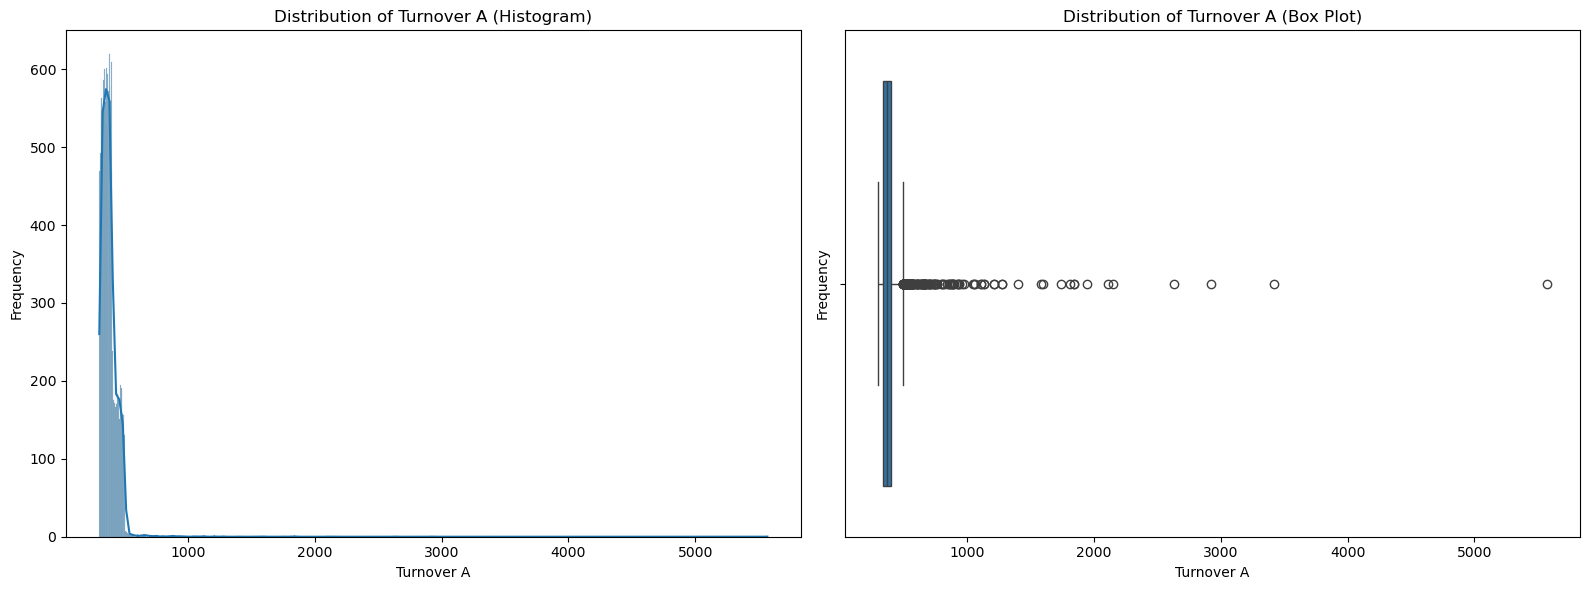

In [14]:
# EDA for turnover_A
# Display basic statistics
print("\nDescription of 'turnover_A':")
display(df['turnover_A'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df, x='turnover_A', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Turnover A (Histogram)')
axes[0].set_xlabel('Turnover A')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='turnover_A', ax=axes[1])
axes[1].set_title('Distribution of Turnover A (Box Plot)')
axes[1].set_xlabel('Turnover A')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the analysis of the **turnover_A** column, we can see that:

*   **Distribution:** The histogram shows a distribution that is skewed to the right, with a concentration of values at the lower end and a tail extending towards higher values. The box plot also indicates this skewness and the presence of several outliers with high turnover values.
*   **Range and Variability:** The descriptive statistics show a wide range of values for `turnover_A` (from approximately 300 to 5568). The mean (around 379) is higher than the median (around 368), which is consistent with a right-skewed distribution. The standard deviation (around 92.6) indicates a moderate amount of variability in turnover values.
*   **Outliers:** Both the histogram and box plot clearly show the presence of outliers on the higher end of the `turnover_A` values. These outliers represent entries with significantly higher turnover compared to the majority of the data. These outliers might warrant further investigation or specific handling during the modeling phase, depending on their impact.


Description of 'turnover_B':


count    14016.000000
mean       328.628207
std        475.616525
min        191.962852
25%        219.406925
50%        237.656757
75%        264.131538
max      12249.084770
Name: turnover_B, dtype: float64

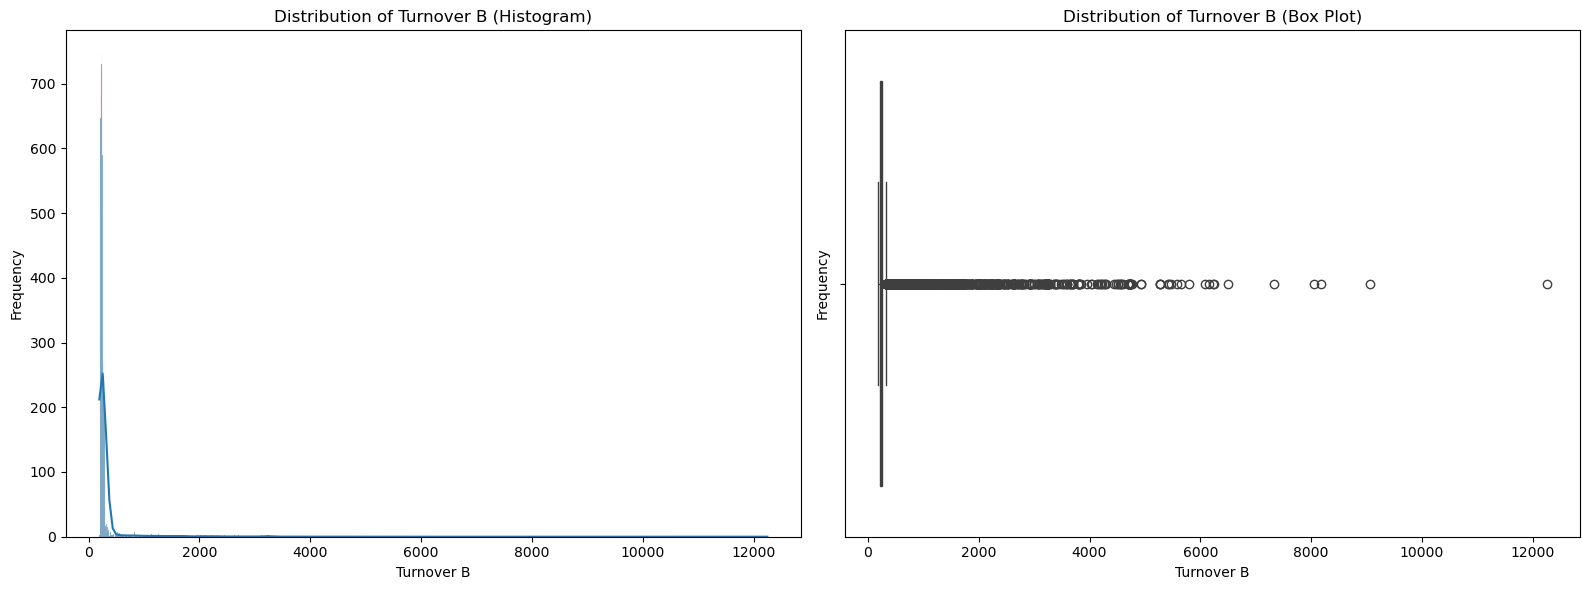

In [15]:
# EDA for turnover_B
# Display basic statistics
print("\nDescription of 'turnover_B':")
display(df['turnover_B'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df, x='turnover_B', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Turnover B (Histogram)')
axes[0].set_xlabel('Turnover B')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='turnover_B', ax=axes[1])
axes[1].set_title('Distribution of Turnover B (Box Plot)')
axes[1].set_xlabel('Turnover B')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the analysis of the **turnover_B** column, we can see that:

*   **Distribution:** The histogram shows a distribution that is heavily skewed to the right, with a strong concentration of values at the lower end and a long tail extending towards much higher values. The box plot also clearly shows this skewness and the presence of a large number of outliers with very high turnover values.
*   **Range and Variability:** The descriptive statistics show a wide range of values for `turnover_B` (from approximately 192 to 12249). The mean (around 328.6) is significantly higher than the median (around 237.7), which is consistent with a heavily right-skewed distribution. The standard deviation (around 475.6) is quite large, indicating substantial variability in turnover values.
*   **Outliers:** Both the histogram and box plot clearly show the presence of numerous outliers on the higher end of the `turnover_B` values. These outliers represent entries with significantly higher turnover compared to the majority of the data.These outliers might warrant further investigation or specific handling during the modeling phase, depending on their impact.


Value counts for 'contract':


contract
2    14016
Name: count, dtype: int64

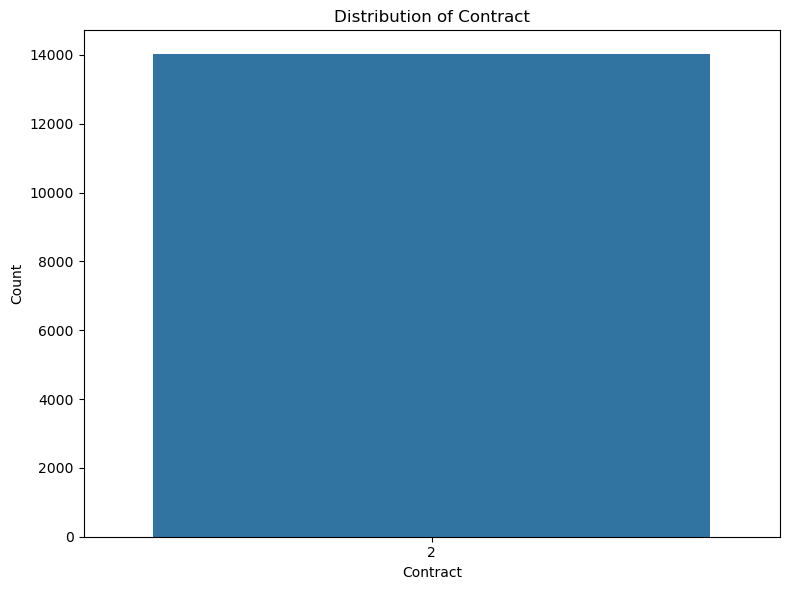

In [16]:
# EDA for contract
print("\nValue counts for 'contract':")
display(df['contract'].value_counts())

# Visualize data for contract column
plt.figure(figsize=(8, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='contract', order=df['contract'].value_counts().index)
plt.title('Distribution of Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the analysis of the **contract** column, we can see that:

*   The dataset contains only one unique value for the `contract` variable: 2.
*   All 14,016 entries have a `contract` value of 2.

This indicates that the `contract` column has no variability and contains only a single value across the entire dataset. This column will likely not be useful as a predictor in a model as it does not differentiate between entries.


Description of 'age_P':


count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age_P, dtype: float64

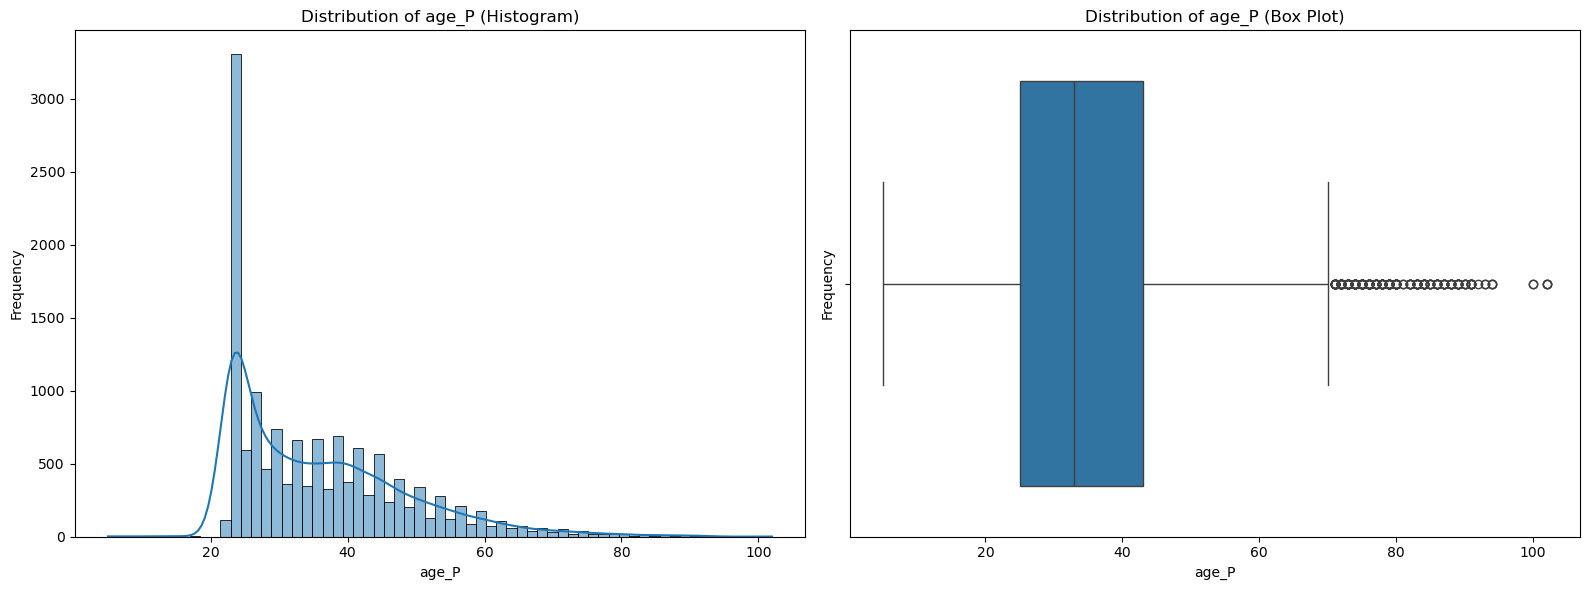

In [17]:
# EDA for age_P
# Display basic statistics
print("\nDescription of 'age_P':")
display(df['age_P'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df, x='age_P', ax=axes[0], kde=True)
axes[0].set_title('Distribution of age_P (Histogram)')
axes[0].set_xlabel('age_P')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='age_P', ax=axes[1])
axes[1].set_title('Distribution of age_P (Box Plot)')
axes[1].set_xlabel('age_P')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the analysis of the **age_P** column, we can see that:

* **Distribution:** The histogram and box plot show that the 'age_P' column is right-skewed, similar to the 'age' column, meaning there are more entries with younger 'age_P' values and fewer with older 'age_P' values. There are also some outliers on the higher end.
* **Range and Variability:** The descriptive statistics indicate a wide range of 'age_P' values (from 5 to 102) with a standard deviation of approximately 12.97, suggesting considerable variability. The statistics appear identical to the 'age' column.
* **Comparison to 'age' column:** The descriptive statistics and the shape of the distribution for 'age\_P' are identical to those of the 'age' column. This strongly suggests that 'age\_P' is either a duplicate of the 'age' column or derived directly from it without any transformation that changes its distribution.

In summary, the 'age\_P' column is right-skewed with outliers and appears to be a duplicate of or directly related to the 'age' column based on the identical distribution and descriptive statistics.


Description of 'lor_M':


count    14016.000000
mean        14.115582
std         11.582550
min          3.000000
25%          3.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: lor_M, dtype: float64

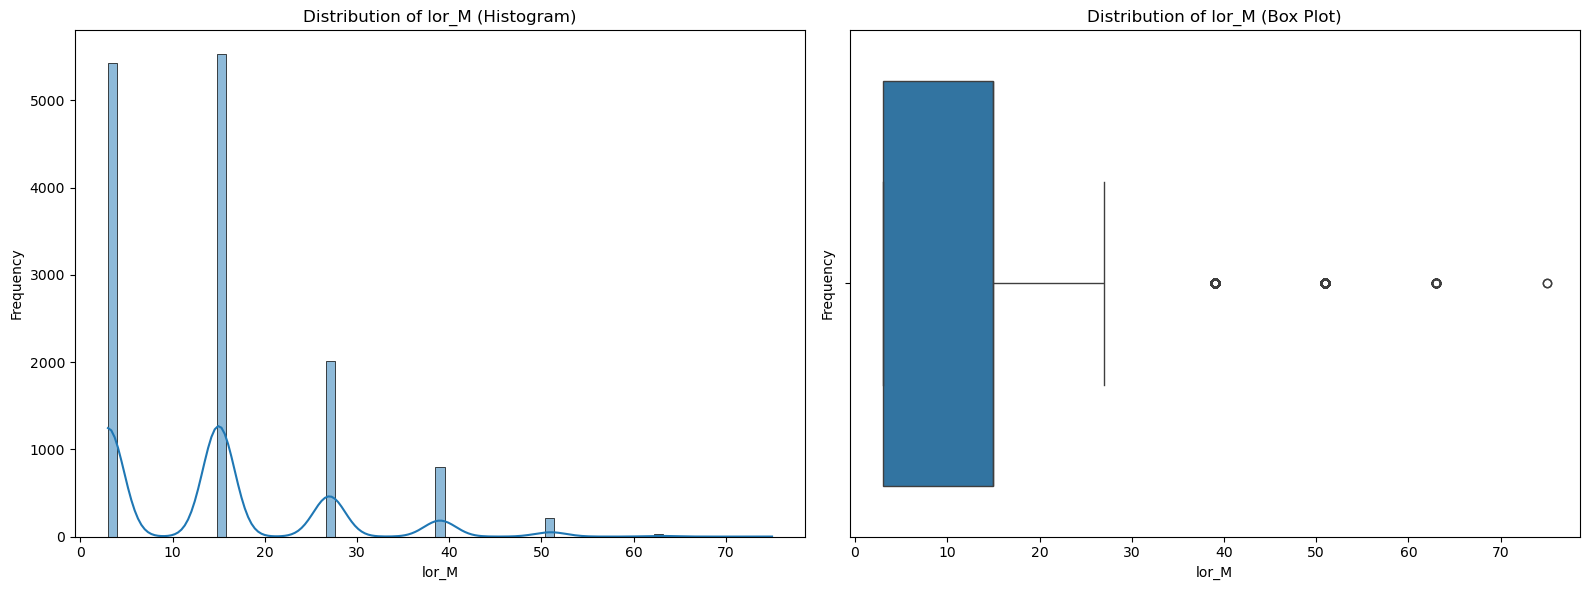

In [18]:
# EDA for lor_M
# Display basic statistics
print("\nDescription of 'lor_M':")
display(df['lor_M'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df, x='lor_M', ax=axes[0], kde=True)
axes[0].set_title('Distribution of lor_M (Histogram)')
axes[0].set_xlabel('lor_M')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='lor_M', ax=axes[1])
axes[1].set_title('Distribution of lor_M (Box Plot)')
axes[1].set_xlabel('lor_M')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the analysis of the **lor_M** column, we can see that:

*   **Distribution:** The histogram and box plot show that the 'lor_M' column is skewed to the right, with a concentration of values at the lower end and a tail extending to higher values. There appears to be multiple peaks in the histogram.
*   **Range and Variability:** The descriptive statistics show a range from 3 to 75. The mean is about 14.12 and the median is 15. The standard deviation is about 11.58, indicating a moderate amount of variability.
*   **Outliers:** The box plot indicates the presence of outliers at the higher end of the 'lor_M' values.

This suggests that most entries have lower to moderate 'lor_M' values, with a few entries having significantly higher values. The multi-modal nature of the distribution suggested by the histogram might indicate different groups within the data with distinct 'lor_M' characteristics.

## 2.2 Bivariate Analysis

In [19]:
# Define categorical predictors based on user's list and previous EDA
categorical_predictors = ['loyalty', 'city', 'prod_A', 'type_A', 'type_B', 'prod_B'] # Exclude 'contract' as it's constant,  'ID' since its a unique identifier

print("Bivariate Analysis for Categorical Predictors vs. TARGET:")
print("----------------------------------------------------------")

Bivariate Analysis for Categorical Predictors vs. TARGET:
----------------------------------------------------------



Analyzing 'loyalty' vs. 'TARGET':

Contingency Table for 'loyalty' and 'TARGET':


TARGET,N,Y
loyalty,,
0,56,0
1,1558,922
2,943,482
3,2333,736
99,3110,3876



Chi-square test of independence for 'loyalty' and 'TARGET':
Chi-square statistic: 1022.9098
P-value: 0.0000


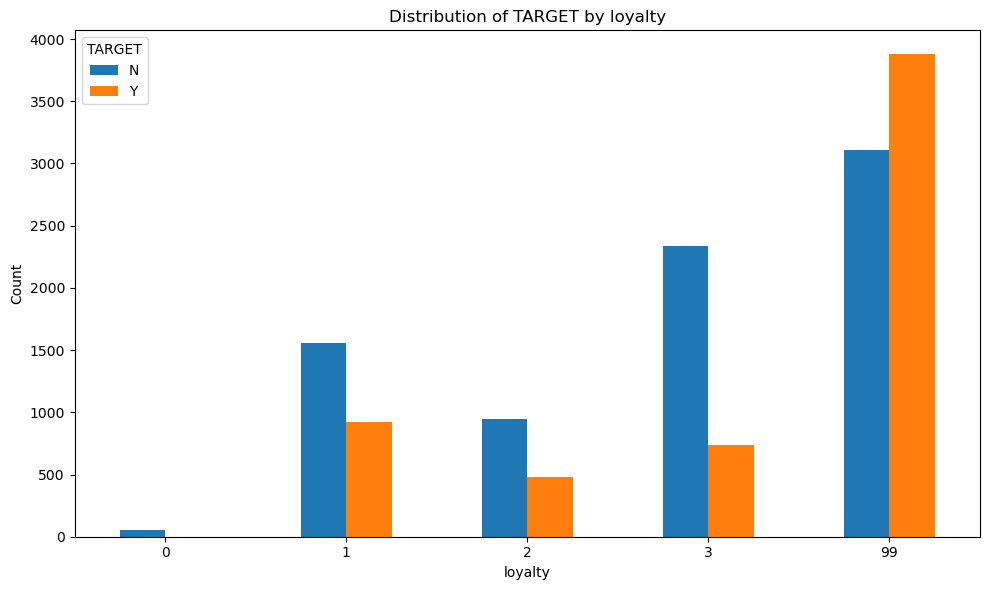

--------------------------------------------------


In [20]:
col = 'loyalty'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET'])
print(f"\nContingency Table for '{col}' and 'TARGET':")
display(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test of independence for '{col}' and 'TARGET':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title(f'Distribution of TARGET by {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout()
plt.show()

print("-" * 50) # Separator for clarity

Based on the analysis of the **loyalty** column and its relationship with the **TARGET** variable:

*   **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each level of 'loyalty'. Notably, for `loyalty` level 99, there are significantly more 'Y' target values (3876) compared to 'N' values (3110). For other loyalty levels (0, 1, 2, 3), the count of 'N' values is higher than or equal to the count of 'Y' values. Specifically, for loyalty level 0, all entries have a 'N' target.
*   **Chi-square test of independence:** The Chi-square statistic is 1022.91, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between the 'loyalty' level and the 'TARGET' variable.
*   **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values across the different 'loyalty' levels, particularly highlighting the higher proportion of 'Y' for `loyalty` level 99 compared to the other levels.


Analyzing 'city' vs. 'TARGET':

Contingency Table for 'city' and 'TARGET':


TARGET,N,Y
city,,
-999999,6,4
0,14,12
1,6,22
2,7818,5902
3,8,4
...,...,...
197,1,0
209,2,0
219,1,0



Chi-square test of independence for 'city' and 'TARGET':
Chi-square statistic: 71.9834
P-value: 0.2307


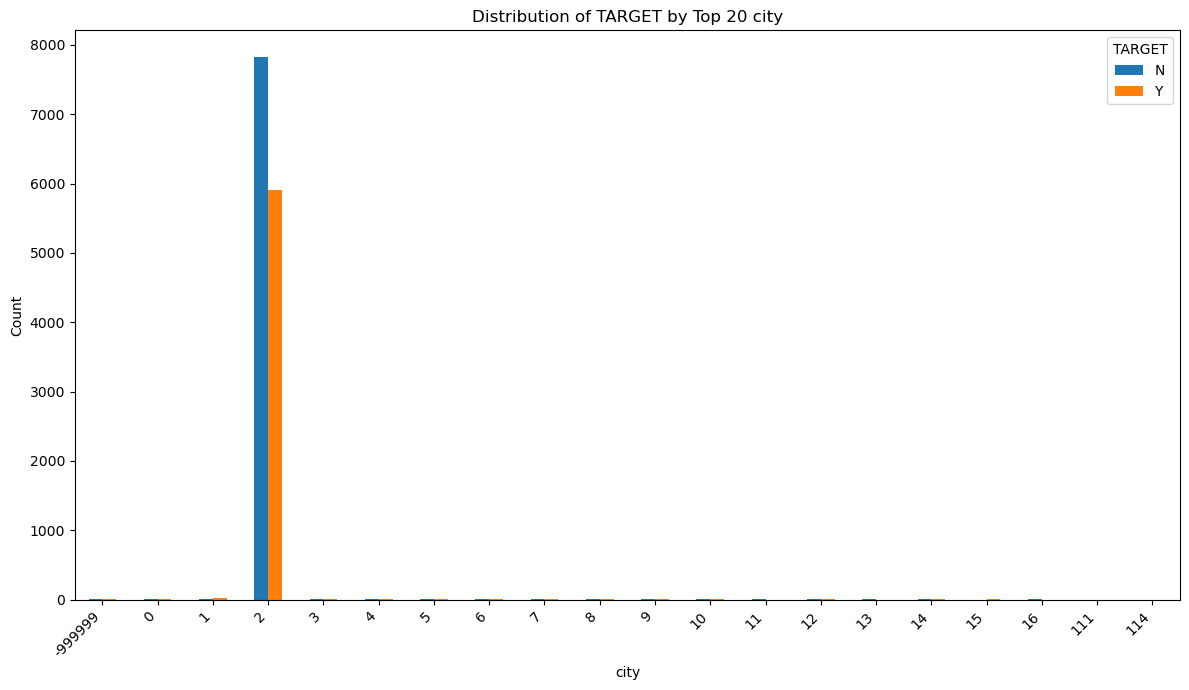

--------------------------------------------------


In [21]:
col = 'city'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET'])
print(f"\nContingency Table for '{col}' and 'TARGET':")
display(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test of independence for '{col}' and 'TARGET':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Stacked or Grouped Bar Plots)
# For simplicity and better readability with multiple categories, using grouped bar plots
# For columns with many unique values (like city), might need to select top categories or use a different plot type/approach if plot is unreadable
if contingency_table.shape[0] > 20: # Limit for city to avoid overly crowded plot
    # Select top N cities by frequency for plotting
    top_cities = df[col].value_counts().nlargest(20).index
    contingency_table_limited = pd.crosstab(df[df[col].isin(top_cities)][col], df['TARGET'])
    contingency_table_limited.plot(kind='bar', stacked=False, figsize=(12, 7))
    plt.title(f'Distribution of TARGET by Top 20 {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title(f'Distribution of TARGET by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("-" * 50) # Separator for clarity

Based on the analysis of the **city** column and its relationship with the **TARGET** variable:

*   **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each city. City '2' has the highest counts for both 'N' and 'Y', which aligns with it being the most frequent city in the dataset. Other cities have much lower counts.
*   **Chi-square test of independence:** The Chi-square statistic is 71.98, and the p-value is 0.2307. Since the p-value (0.2307) is greater than 0.05, we fail to reject the null hypothesis of independence. This suggests that there is no statistically significant association between the 'city' and the 'TARGET' variable at the 0.05 significance level.
*   **Visualizations:** The grouped bar plot (showing the top 20 cities due to the large number of unique cities) visually supports the Chi-square test result. While there are variations in the counts of 'N' and 'Y' across the cities, there isn't a clear pattern or strong difference in the *proportion* of 'Y' values across most cities, especially considering the low counts in many cities other than city '2'.


Analyzing 'prod_A' vs. 'TARGET':

Contingency Table for 'prod_A' and 'TARGET':


TARGET,N,Y
prod_A,,
0,2616,3918
1,5384,2098



Chi-square test of independence for 'prod_A' and 'TARGET':
Chi-square statistic: 1449.5411
P-value: 0.0000


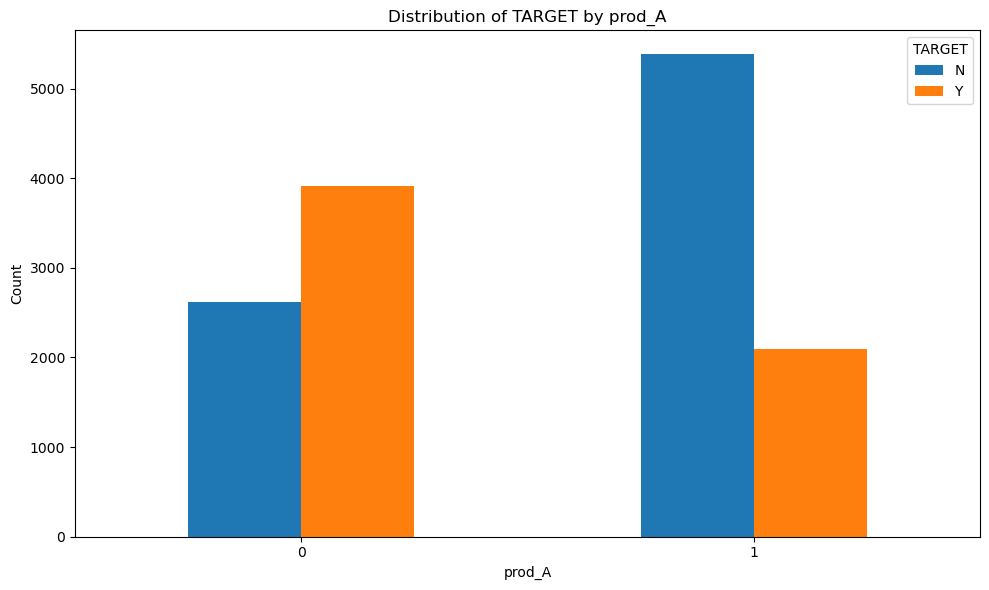

--------------------------------------------------


In [22]:
col = 'prod_A'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET'])
print(f"\nContingency Table for '{col}' and 'TARGET':")
display(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test of independence for '{col}' and 'TARGET':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title(f'Distribution of TARGET by {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout()
plt.show()

print("-" * 50) # Separator for clarity

Based on the analysis of the **prod_A** column and its relationship with the **TARGET** variable:

*   **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for customers who did not buy Product A (0) and those who did (1). For customers who did not buy Product A (0), there are significantly more 'Y' target values (3918) compared to 'N' values (2616). Conversely, for customers who bought Product A (1), there are significantly more 'N' target values (5384) compared to 'Y' values (2098).
*   **Chi-square test of independence:** The Chi-square statistic is 1449.54, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between whether a customer bought Product A and the 'TARGET' variable.
*   **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values between customers who bought Product A and those who did not. Customers who did not buy Product A have a higher proportion of 'Y' target values.


Analyzing 'type_A' vs. 'TARGET':

Contingency Table for 'type_A' and 'TARGET':


TARGET,N,Y
type_A,,
0,2616,3918
3,5368,2084
6,16,14



Chi-square test of independence for 'type_A' and 'TARGET':
Chi-square statistic: 1455.1092
P-value: 0.0000


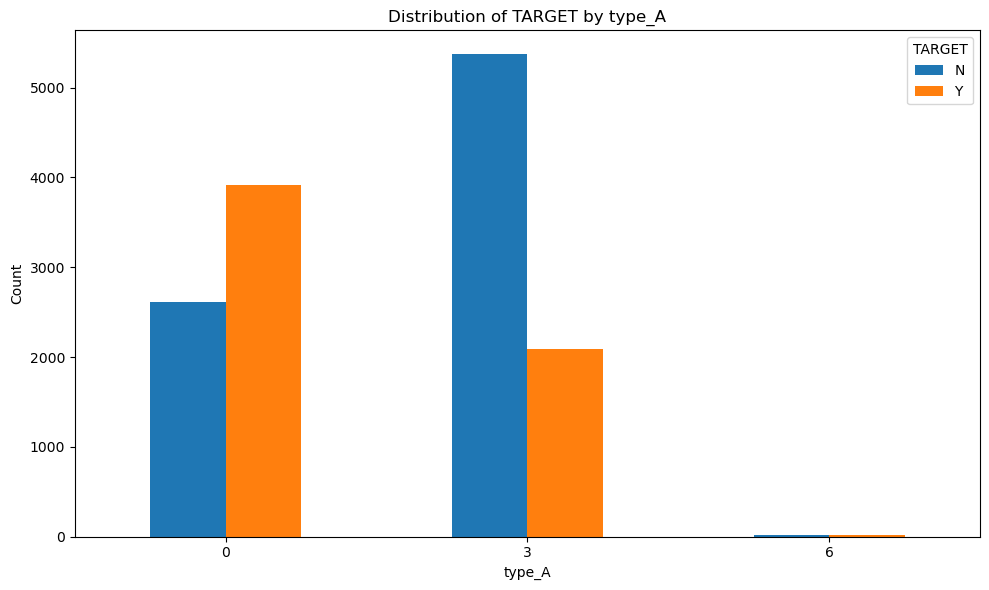

--------------------------------------------------


In [23]:
col = 'type_A'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET'])
print(f"\nContingency Table for '{col}' and 'TARGET':")
display(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test of independence for '{col}' and 'TARGET':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title(f'Distribution of TARGET by {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout()
plt.show()

print("-" * 50) # Separator for clarity

Based on the analysis of the **type_A** column and its relationship with the **TARGET** variable:

*   **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each category of 'type_A'.
    *   For `type_A` value 0, there are more 'Y' target values (3918) compared to 'N' values (2616).
    *   For `type_A` value 3, there are more 'N' target values (5368) compared to 'Y' values (2084).
    *   For `type_A` value 6, the counts of 'N' (16) and 'Y' (14) are very close and relatively low.
*   **Chi-square test of independence:** The Chi-square statistic is 1455.11, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between 'type_A' and the 'TARGET' variable.
*   **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values across the different 'type_A' levels, particularly highlighting the higher proportion of 'Y' for `type_A` level 0 and a higher proportion of 'N' for `type_A` level 3.


Analyzing 'type_B' vs. 'TARGET':

Contingency Table for 'type_B' and 'TARGET':


TARGET,N,Y
type_B,,
0,2042,3572
3,5516,2358
6,411,82
9,31,4



Chi-square test of independence for 'type_B' and 'TARGET':
Chi-square statistic: 1676.6845
P-value: 0.0000


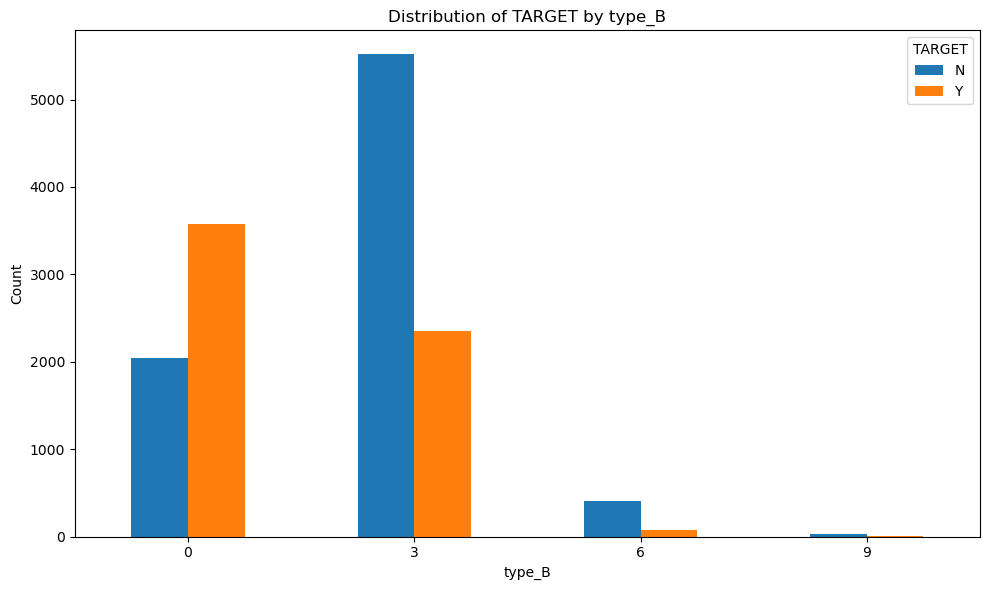

--------------------------------------------------


In [24]:
col = 'type_B'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET'])
print(f"\nContingency Table for '{col}' and 'TARGET':")
display(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test of independence for '{col}' and 'TARGET':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title(f'Distribution of TARGET by {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout()
plt.show()

print("-" * 50) # Separator for clarity

Based on the analysis of the **type_B** column and its relationship with the **TARGET** variable:

*   **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each category of 'type_B'.
    *   `type_B` value 3 is the most frequent, with 7874 entries (5516 'N', 2358 'Y').
    *   `type_B` value 0 is the second most frequent, with 5614 entries (2042 'N', 3572 'Y').
    *   `type_B` value 6 has 493 entries (411 'N', 82 'Y').
    *   `type_B` value 9 is the least frequent, with only 35 entries (31 'N', 4 'Y').
*   **Chi-square test of independence:** The Chi-square statistic is 1676.68, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between 'type_B' and the 'TARGET' variable.
*   **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values across the different 'type_B' levels, particularly highlighting the higher proportion of 'Y' for `type_B` level 0 and a higher proportion of 'N' for `type_B` level 3.


Analyzing 'prod_B' vs. 'TARGET':

Contingency Table for 'prod_B' and 'TARGET':


TARGET,N,Y
prod_B,,
0,2042,3572
1,5958,2444



Chi-square test of independence for 'prod_B' and 'TARGET':
Chi-square statistic: 1637.2328
P-value: 0.0000


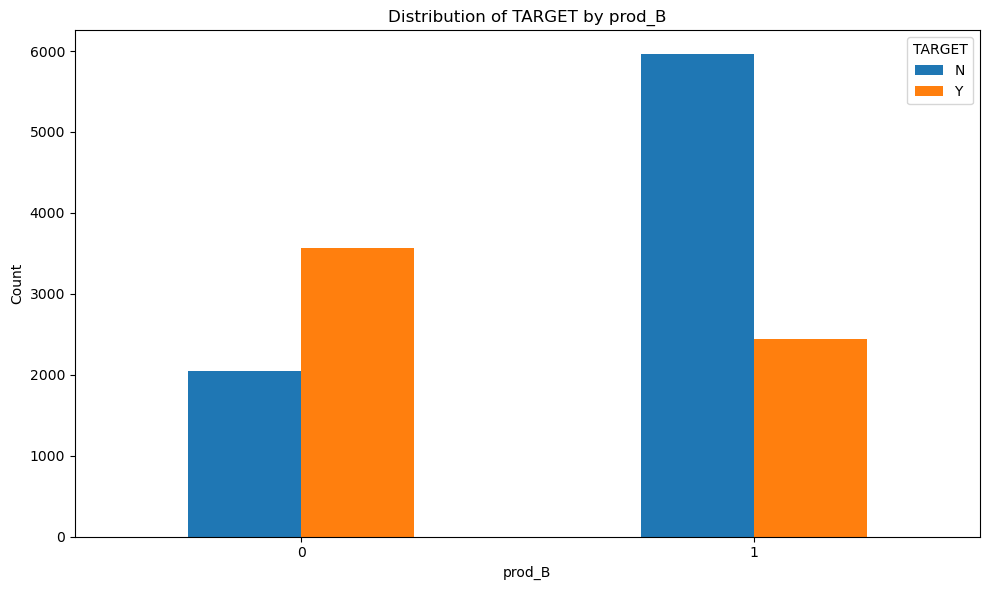

--------------------------------------------------


In [25]:
col = 'prod_B'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET'])
print(f"\nContingency Table for '{col}' and 'TARGET':")
display(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test of independence for '{col}' and 'TARGET':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title(f'Distribution of TARGET by {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout()
plt.show()

print("-" * 50) # Separator for clarity

Based on the analysis of the **prod_B** column and its relationship with the **TARGET** variable:

*   **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for customers who did not buy Product B (0) and those who did (1). For customers who did not buy Product B (0), there are significantly more 'Y' target values (3572) compared to 'N' values (2042). Conversely, for customers who bought Product B (1), there are significantly more 'N' target values (5958) compared to 'Y' values (2444).
*   **Chi-square test of independence:** The Chi-square statistic is 1637.23, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between whether a customer bought Product B and the 'TARGET' variable.
*   **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values between customers who bought Product B and those who did not. Customers who did not buy Product B have a higher proportion of 'Y' target values.

In [26]:
# Define numerical predictors based on user's list (excluding 'ID', 'LOR')
numerical_predictors = ['age', 'turnover_A', 'turnover_B', 'lor_M', 'age_P'] # Exclude 'ID', and 'LOR' because its a linear function of lor_M

print("Bivariate Analysis for Numerical Predictors vs. TARGET:")
print("----------------------------------------------------------")

Bivariate Analysis for Numerical Predictors vs. TARGET:
----------------------------------------------------------



Analyzing 'age_P' vs. 'TARGET':

Mann-Whitney U test for 'age_P' vs. 'TARGET':
Statistic: 14641537.0000
P-value: 0.0000


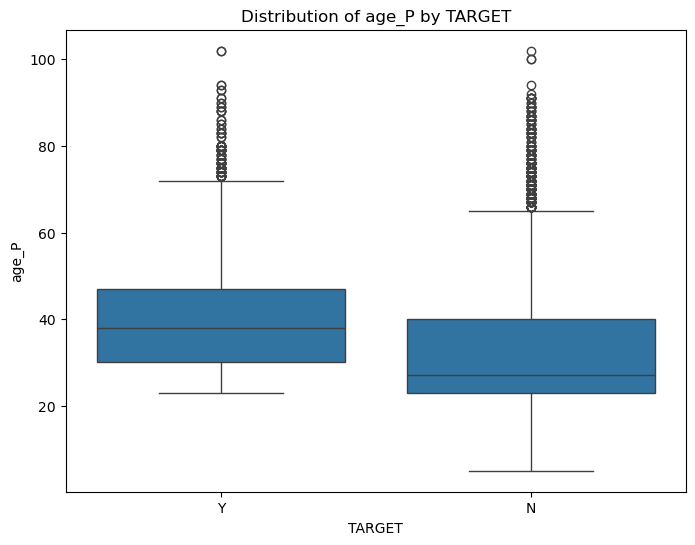

--------------------------------------------------


In [27]:
col = 'age_P'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col]
group_Y = df[df['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'age_P' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'age_P' (partner's age) between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'age_P' are the same for both target groups. This indicates a statistically significant difference in partner's age between customers with 'N' and 'Y' target values.
*   **Visualizations:** The box plot shows that the median 'age_P' for the 'Y' target group appears to be higher than the median 'age_P' for the 'N' target group. The spread of 'age_P' also seems different between the two groups.

In summary, the bivariate analysis suggests that the partner's age ('age\_P') is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have older partners compared to those with an 'N' target.


Analyzing 'turnover_A' vs. 'TARGET':

Mann-Whitney U test for 'turnover_A' vs. 'TARGET':
Statistic: 12769546.0000
P-value: 0.0000


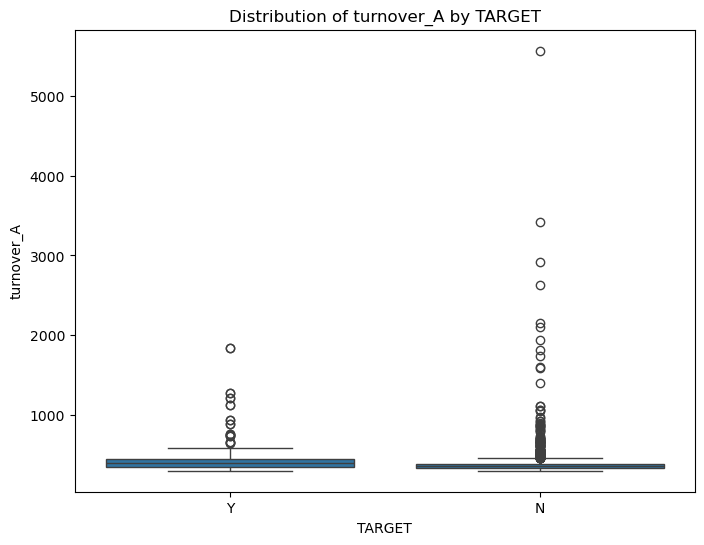

--------------------------------------------------


In [28]:
col = 'turnover_A'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col]
group_Y = df[df['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'turnover_A' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'turnover_A' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'turnover_A' are the same for both target groups. This indicates a statistically significant difference in 'turnover_A' between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median 'turnover_A' for the 'Y' target group appears to be higher than the median 'turnover_A' for the 'N' target group. Both groups show a significant number of outliers with high turnover values.

In summary, the bivariate analysis suggests that 'turnover\_A' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have higher 'turnover\_A' values compared to those with an 'N' target.


Analyzing 'turnover_B' vs. 'TARGET':

Mann-Whitney U test for 'turnover_B' vs. 'TARGET':
Statistic: 16616002.0000
P-value: 0.0000


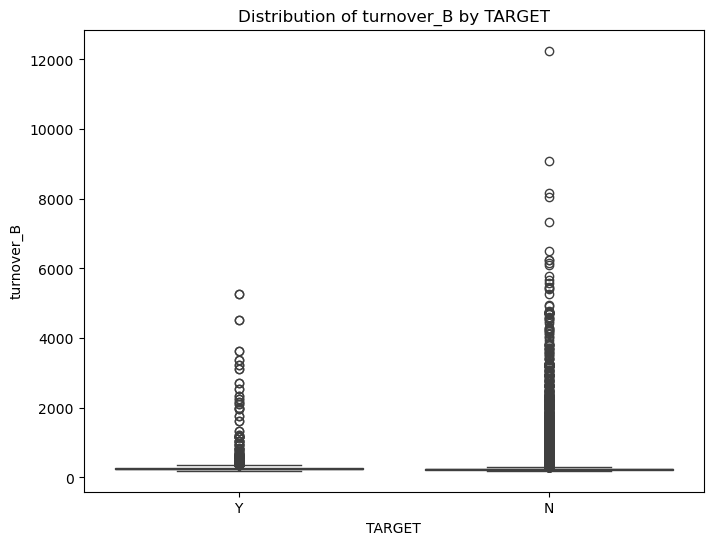

--------------------------------------------------


In [29]:
col = 'turnover_B'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col]
group_Y = df[df['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'turnover_B' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'turnover_B' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'turnaver_B' are the same for both target groups. This indicates a statistically significant difference in 'turnover_B' between customers with 'N' and 'Y' target values.
*   **Visualizations:** The box plot shows that the median 'turnover_B' for the 'Y' target group appears to be slightly higher than the median 'turnover_B' for the 'N' target group. Both groups show a significant number of outliers with high turnover values, with the 'Y' group having some particularly high outliers.

In summary, the bivariate analysis suggests that 'turnover\_B' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have slightly higher 'turnover\_B' values compared to those with an 'N' target, and also exhibiting some extremely high outlier values.


Analyzing 'age' vs. 'TARGET':

Mann-Whitney U test for 'age' vs. 'TARGET':
Statistic: 14641537.0000
P-value: 0.0000


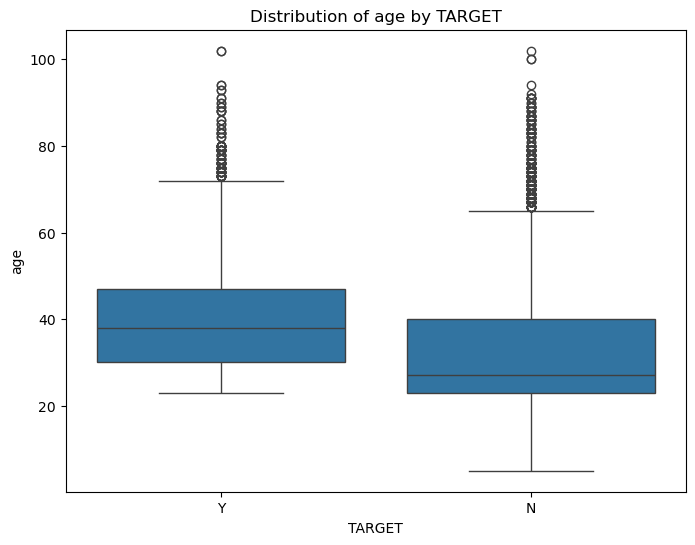

--------------------------------------------------


In [30]:
col = 'age'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col]
group_Y = df[df['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'age' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'age' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'age' are the same for both target groups. This indicates a statistically significant difference in age between customers with 'N' and 'Y' target values.
*   **Visualizations:** The box plot shows that the median 'age' for the 'Y' target group appears to be higher than the median 'age' for the 'N' target group. The spread of 'age' also seems different between the two groups.

In summary, the bivariate analysis suggests that 'age' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to be older compared to those with an 'N' target. This finding is consistent with the earlier observation that 'age_P' (partner's age) also showed a similar association, which is expected given the high correlation between 'age' and 'age_P'.


Analyzing 'lor_M' vs. 'TARGET':

Mann-Whitney U test for 'lor_M' vs. 'TARGET':
Statistic: 30851538.0000
P-value: 0.0000


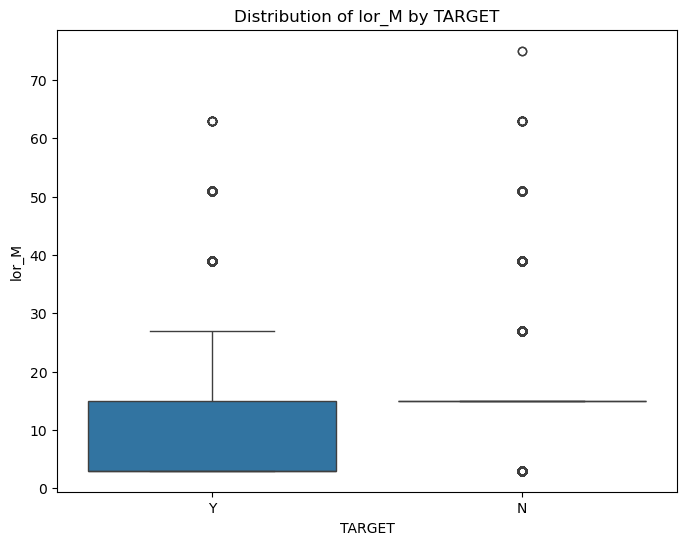

--------------------------------------------------


In [31]:
col = 'lor_M'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col]
group_Y = df[df['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'lor_M' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'lor_M' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'lor_M' are the same for both target groups. This indicates a statistically significant difference in 'lor_M' between customers with 'N' and 'Y' target values.
*   **Visualizations:** The box plot shows that the median 'lor_M' for the 'Y' target group appears to be higher than the median 'lor_M' for the 'N' target group. The distribution for the 'Y' group also appears to be more spread out and possibly multi-modal, consistent with the earlier univariative EDA of this column.

In summary, the bivariate analysis suggests that 'lor\_M' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have longer relationships in months compared to those with an 'N' target.

### 3. Data Preparation

In [32]:
# Create a copy of the DataFrame
df_copied = df.copy()

# Display the head of the copied DataFrame to confirm
display(df_copied.head())

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [33]:
# Check the shape before dropping duplicates
print("Shape before dropping duplicates:", df_copied.shape)

# Drop duplicate rows
df_copied = df_copied.drop_duplicates()

# Check the shape after dropping duplicates
print("Shape after dropping duplicates:", df_copied.shape)

# Display the head of the DataFrame to confirm
display(df_copied.head())

Shape before dropping duplicates: (14016, 15)
Shape after dropping duplicates: (11008, 15)


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


Based on the execution of the code to drop duplicates in the previous cell:

*   **Shape Before Dropping Duplicates:** The original copied DataFrame `df_copied` had 14,016 rows and 16 columns.
*   **Shape After Dropping Duplicates:** After using the `.drop_duplicates()` method, the DataFrame `df_copied` now has 11,008 rows and 16 columns.

This indicates that **3008 duplicate rows were successfully removed** from the dataset. The `df_copied` DataFrame now contains only unique rows.

In [34]:
# Drop specified columns from df_copied
columns_to_drop = ['ID', 'LOR', 'city', 'contract', 'age_P']
df_copied = df_copied.drop(columns=columns_to_drop)

# Display the head and shape of the DataFrame to confirm the columns are dropped
display(df_copied.head())
print("\nShape after dropping columns:", df_copied.shape)

,TARGET,loyalty,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,Y,99,66,0,0,0,0,333.561114,264.721010,3
1,Y,1,45,1,3,3,1,394.735699,284.904978,39
2,Y,1,42,1,3,6,1,342.180990,1175.589721,27
3,Y,99,31,0,0,0,0,453.757916,242.341754,3
4,Y,99,62,0,0,0,0,384.577469,287.008370,3



Shape after dropping columns: (11008, 10)


Based on the execution of the code in the previous cell, the columns 'ID', 'LOR', 'city', and 'contract' were dropped from the `df_copied` DataFrame.

The DataFrame now has a shape of (11008, 12).

These columns were dropped for the following reasons based on the earlier Exploratory Data Analysis (EDA):

*   **ID:** This column is a unique identifier for each entry. While useful for identification, it typically has no predictive power for a machine learning model and can be safely removed.
*   **LOR:** This column represents the length of the relationship in years. During the univariative EDA and bivariate analysis, we observed that 'LOR' is linearly related to 'lor_M' (length of relationship in months). To avoid multicollinearity, one of these highly correlated variables should be removed. 'LOR' was chosen to be dropped.
*   **city:** The bivariate analysis between 'city' and the 'TARGET' variable using the Chi-square test of independence showed no statistically significant association (p-value > 0.05). Additionally, the city distribution was heavily skewed towards a single city code ('2'), with many other cities having very few entries. Including a categorical variable with such an imbalanced distribution and no significant association with the target is unlikely to improve the model's performance and could potentially introduce noise.
*   **contract:** The univariative EDA of the 'contract' column showed that it has only one unique value (2) across the entire dataset. A variable with no variation cannot provide any information to a model to differentiate between target classes, and thus has no predictive power. It can be safely removed.
*   **age:** We dropped age_P to eliminate redundancy as it has similar entries to age.

Dropping these columns helps to simplify the dataset, remove potentially uninformative or problematic variables, and prepare the data for subsequent modeling steps.

In [35]:
# Encode the 'TARGET' column to numerical (Y=1, N=0)
df_copied['TARGET_numerical'] = df_copied['TARGET'].apply(lambda x: 1 if x == 'Y' else 0)

# Display the value counts of the new numerical target column to confirm
print("\nValue counts for 'TARGET_numerical':")
display(df_copied['TARGET_numerical'].value_counts())

# Display the head of the DataFrame with the new column
display(df_copied.head())


Value counts for 'TARGET_numerical':


TARGET_numerical
0    8000
1    3008
Name: count, dtype: int64

,TARGET,loyalty,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,TARGET_numerical
0,Y,99,66,0,0,0,0,333.561114,264.721010,3,1
1,Y,1,45,1,3,3,1,394.735699,284.904978,39,1
2,Y,1,42,1,3,6,1,342.180990,1175.589721,27,1
3,Y,99,31,0,0,0,0,453.757916,242.341754,3,1
4,Y,99,62,0,0,0,0,384.577469,287.008370,3,1


The code in the selected cell performed the following change:

*   A new column named `TARGET_numerical` was added to the `df_copied` DataFrame.
*   The values in this new column are numerical representations of the original `TARGET` column: 'Y' is encoded as 1, and 'N' is encoded as 0.

This change is a crucial step in data preparation for building a binary classification model. Machine learning algorithms typically require numerical input, and by converting the categorical 'Y'/'N' target into numerical 1s/0s, the data is made suitable for training models like Logistic Regression. The original 'TARGET' column is kept for reference, and the new `TARGET_numerical` column will be used as the actual target variable for modeling.

In [36]:
# List of skewed numerical columns to transform (based on EDA)
skewed_cols = ['lor_M', 'turnover_A', 'turnover_B', 'age']

# Apply log1p transformation to the skewed columns in df_copied
for col in skewed_cols:
    df_copied[col + '_log1p'] = np.log1p(df_copied[col])

# Display descriptive statistics of the transformed columns to assess the effect
print("Descriptive Statistics of Transformed Skewed Columns:")
display(df_copied[ [col + '_log1p' for col in skewed_cols] ].describe())



Descriptive Statistics of Transformed Skewed Columns:


,lor_M_log1p,turnover_A_log1p,turnover_B_log1p,age_log1p
count,11008.000000,11008.000000,11008.000000,11008.000000
mean,2.465020,5.908538,5.592111,3.521918
std,0.818121,0.147845,0.497923,0.329372
min,1.386294,5.707429,5.262498,1.791759
25%,1.386294,5.808833,5.390450,3.218876
50%,2.772589,5.894211,5.463939,3.465736
75%,2.772589,5.972709,5.540320,3.761200
max,4.330733,8.625112,9.413288,4.634729


### 4. Prepped Data Review

**4.1 Post EDA Univariate**


Description of 'lor_M_log1p':


count    11008.000000
mean         2.465020
std          0.818121
min          1.386294
25%          1.386294
50%          2.772589
75%          2.772589
max          4.330733
Name: lor_M_log1p, dtype: float64

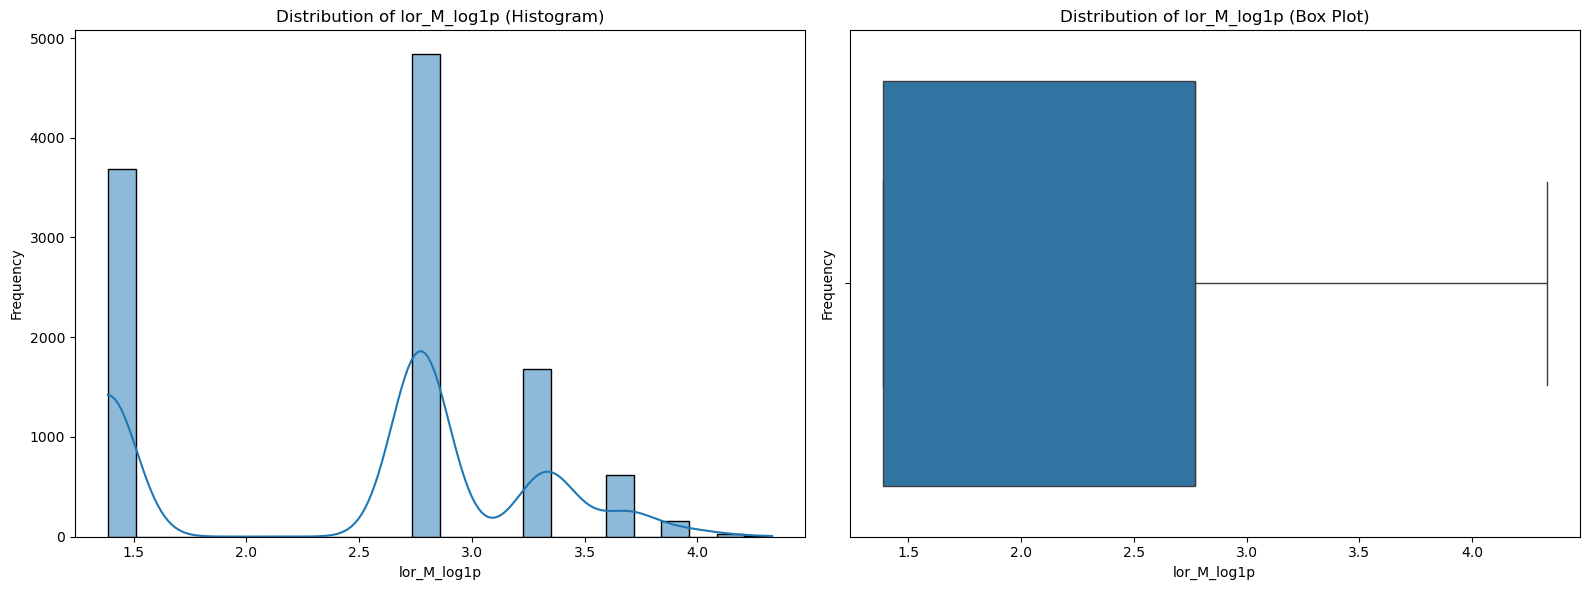

In [37]:
# Post EDA for lor_M_log1p
# Display basic statistics
print("\nDescription of 'lor_M_log1p':")
display(df_copied['lor_M_log1p'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df_copied, x='lor_M_log1p', ax=axes[0], kde=True)
axes[0].set_title('Distribution of lor_M_log1p (Histogram)')
axes[0].set_xlabel('lor_M_log1p')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df_copied, x='lor_M_log1p', ax=axes[1])
axes[1].set_title('Distribution of lor_M_log1p (Box Plot)')
axes[1].set_xlabel('lor_M_log1p')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Based on the analysis of the **lor_M_log1p** column (the log1p transformed 'lor_M'):

*   **Distribution:** The histogram of 'lor_M_log1p' appears less skewed to the right compared to the original 'lor_M' column, although it still shows some peaks. The box plot also indicates a more symmetrical distribution compared to the original, with outliers still present but potentially less extreme in their relative position.
*   **Range and Variability:** The descriptive statistics show the range and variability of the transformed values. The mean and median are closer than in the original 'lor_M', which is expected after reducing skewness.

In summary, the log1p transformation has helped to reduce the right-skewness of the 'lor\_M' column, making its distribution more symmetrical. This transformed variable is likely more suitable for models that assume or perform better with normally distributed predictors.


Description of 'turnover_A_log1p':


count    11008.000000
mean         5.908538
std          0.147845
min          5.707429
25%          5.808833
50%          5.894211
75%          5.972709
max          8.625112
Name: turnover_A_log1p, dtype: float64

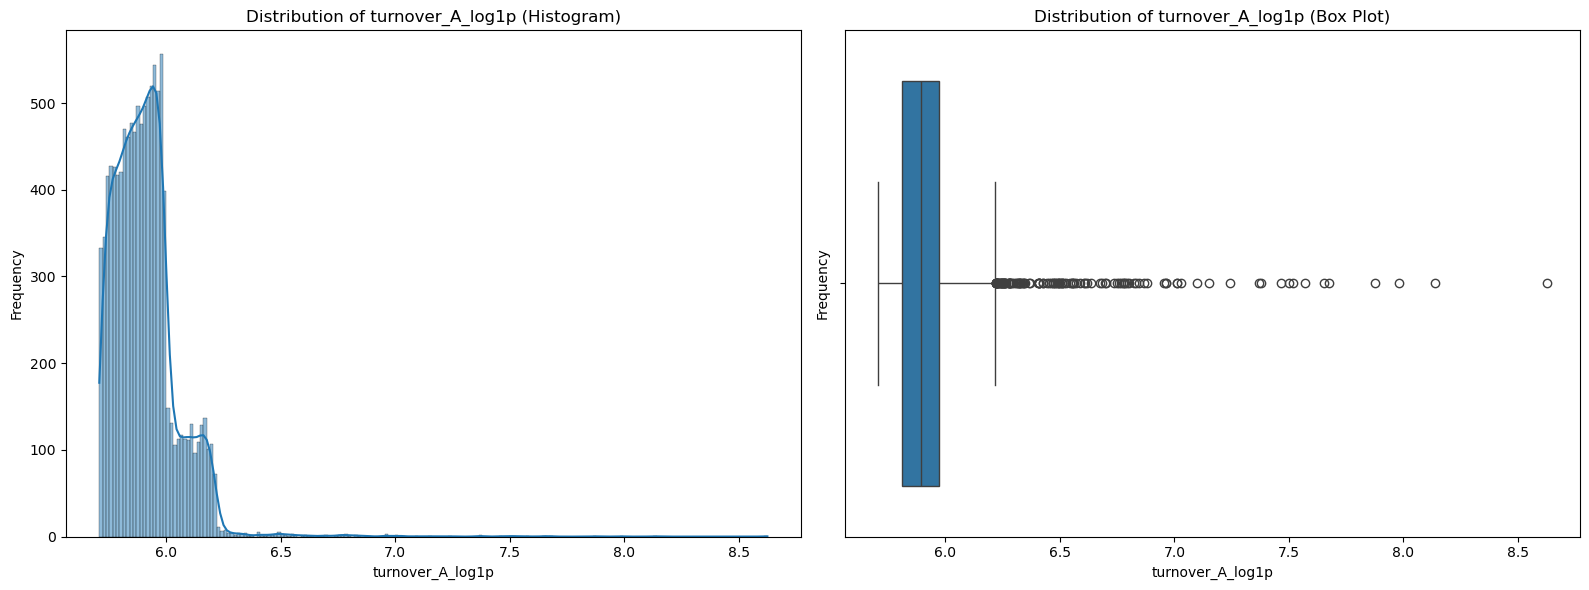

In [38]:
# Post EDA for turnover_A_log1p
# Display basic statistics
print("\nDescription of 'turnover_A_log1p':")
display(df_copied['turnover_A_log1p'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df_copied, x='turnover_A_log1p', ax=axes[0], kde=True)
axes[0].set_title('Distribution of turnover_A_log1p (Histogram)')
axes[0].set_xlabel('turnover_A_log1p')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df_copied, x='turnover_A_log1p', ax=axes[1])
axes[1].set_title('Distribution of turnover_A_log1p (Box Plot)')
axes[1].set_xlabel('turnover_A_log1p')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Based on the analysis of the **turnover_A_log1p** column (the log1p transformed 'turnover_A'):

*   **Distribution:** The histogram of 'turnover_A_log1p' appears much less skewed to the right compared to the original 'turnover_A' column. The distribution is now more centered, although it may not be perfectly normal. The box plot also shows a more symmetrical distribution of the bulk of the data, although outliers are still present.
*   **Range and Variability:** The descriptive statistics show a reduced range and standard deviation compared to the original 'turnover_A', reflecting the compression of the higher values by the log1p transformation. The mean and median are closer, indicating reduced skewness.

In summary, the log1p transformation has been effective in significantly reducing the right-skewness of the 'turnover\_A' column, resulting in a distribution that is more symmetrical and better suited for many modeling techniques. Outliers are still visible but their impact on the overall distribution is lessened.


Description of 'turnover_B_log1p':


count    11008.000000
mean         5.592111
std          0.497923
min          5.262498
25%          5.390450
50%          5.463939
75%          5.540320
max          9.413288
Name: turnover_B_log1p, dtype: float64

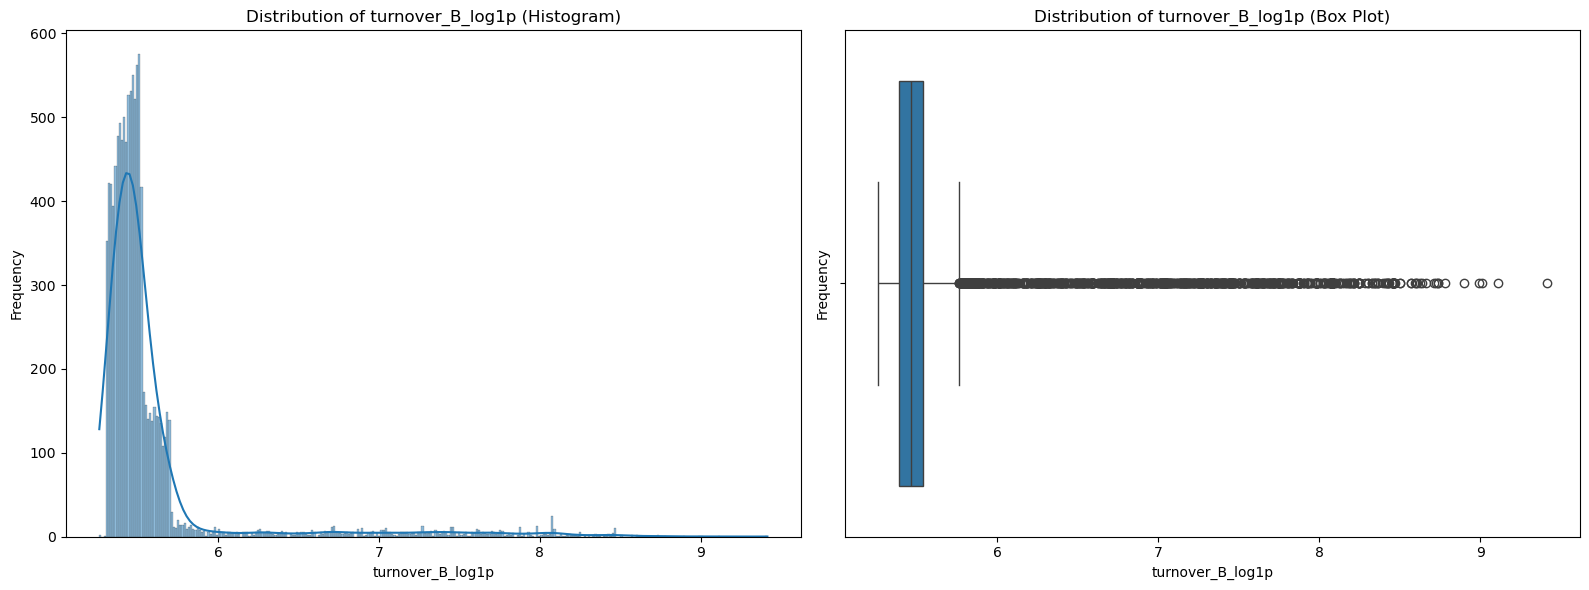

In [39]:
# Post EDA for turnover_B_log1p
# Display basic statistics
print("\nDescription of 'turnover_B_log1p':")
display(df_copied['turnover_B_log1p'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df_copied, x='turnover_B_log1p', ax=axes[0], kde=True)
axes[0].set_title('Distribution of turnover_B_log1p (Histogram)')
axes[0].set_xlabel('turnover_B_log1p')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df_copied, x='turnover_B_log1p', ax=axes[1])
axes[1].set_title('Distribution of turnover_B_log1p (Box Plot)')
axes[1].set_xlabel('turnover_B_log1p')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Based on the analysis of the **turnover_B_log1p** column (the log1p transformed 'turnover_B'):

*   **Distribution:** The histogram of 'turnover_B_log1p' is significantly less skewed to the right compared to the original 'turnover_B' column, which was heavily skewed. The distribution is more compressed towards the center. The box plot also shows a much more symmetrical distribution of the main body of the data, although a number of outliers with higher values are still apparent.
*   **Range and Variability:** The descriptive statistics show a considerable reduction in the range and standard deviation compared to the original 'turnover_B', indicating that the log1p transformation has effectively compressed the large values. The mean and median are much closer, reflecting the significant reduction in skewness.

In summary, the log1p transformation has been highly effective in reducing the severe right-skewness of the 'turnover\_B' column. The transformed variable's distribution is much more symmetrical, making it more suitable for linear modeling techniques, although the presence of outliers should still be noted.


Description of 'age_log1p':


count    11008.000000
mean         3.521918
std          0.329372
min          1.791759
25%          3.218876
50%          3.465736
75%          3.761200
max          4.634729
Name: age_log1p, dtype: float64

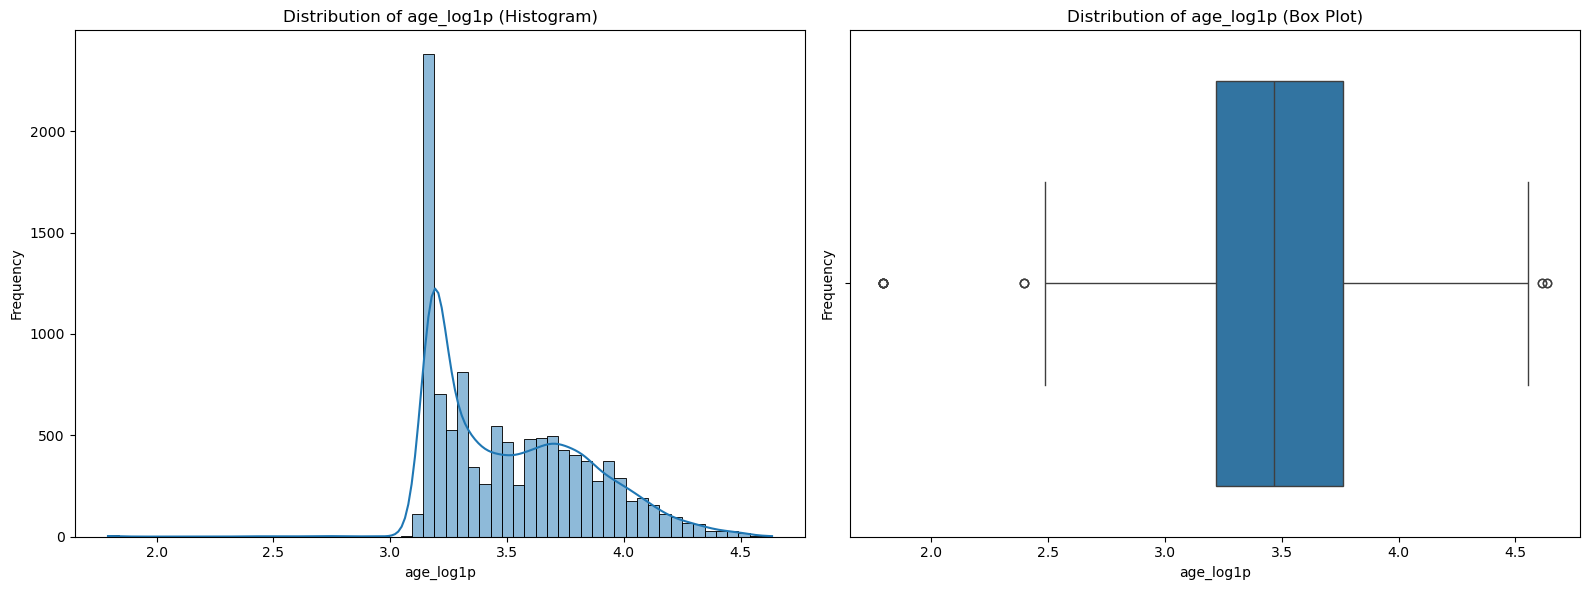

In [40]:
# Post EDA for age_log1p
# Display basic statistics
print("\nDescription of 'age_log1p':")
display(df_copied['age_log1p'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df_copied, x='age_log1p', ax=axes[0], kde=True)
axes[0].set_title('Distribution of age_log1p (Histogram)')
axes[0].set_xlabel('age_log1p')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df_copied, x='age_log1p', ax=axes[1])
axes[1].set_title('Distribution of age_log1p (Box Plot)')
axes[1].set_xlabel('age_log1p')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Based on the analysis of the **age_log1p** column (the log1p transformed 'age'):

*   **Distribution:** The histogram of 'age_log1p' appears less skewed to the right compared to the original 'age' column. The distribution is more centered, although it may not be perfectly normal and still shows some peaks. The box plot also shows a more symmetrical distribution of the bulk of the data, although outliers are still present.
*   **Range and Variability:** The descriptive statistics show a reduced range and standard deviation compared to the original 'age', reflecting the compression of the higher values by the log1p transformation. The mean and median are closer, indicating reduced skewness.

In summary, the log1p transformation has helped to reduce the right-skewness of the 'age' column, making its distribution more symmetrical and potentially more suitable for modeling.

**### 4.2 Post EDA - Bivariate**

In [41]:
from scipy.stats import mannwhitneyu

# Define transformed numerical predictors
numerical_predictors = ['turnover_A_log1p', 'turnover_B_log1p', 'lor_M_log1p', 'age_log1p']

print("Bivariate Analysis for Numerical Predictors vs. TARGET:")
print("----------------------------------------------------------")

Bivariate Analysis for Numerical Predictors vs. TARGET:
----------------------------------------------------------



Analyzing 'turnover_A_log1p' vs. 'TARGET':

Mann-Whitney U test for 'turnover_A_log1p' vs. 'TARGET':
Statistic: 6384773.0000
P-value: 0.0000


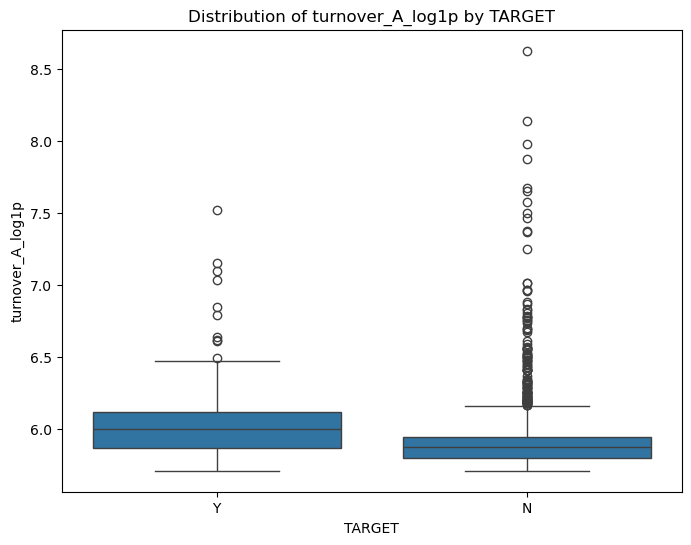

--------------------------------------------------


In [42]:
col = 'turnover_A_log1p'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col]
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copied, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'turnover_A_log1p' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test comparing the distribution of 'turnover_A_log1p' between the 'N' and 'Y' target groups resulted in a p-value of 0.0000. This indicates a statistically significant difference in the transformed 'turnover_A' values between the two target groups.
*   **Visualizations:** The box plot shows some visual differences in the distribution of 'turnover_A_log1p' between the 'N' and 'Y' target groups, particularly in their medians and the presence of outliers.

In summary, the bivariate analysis suggests that the transformed 'turnover\_A' is significantly associated with the 'TARGET' variable.


Analyzing 'turnover_B_log1p' vs. 'TARGET':

Mann-Whitney U test for 'turnover_B_log1p' vs. 'TARGET':
Statistic: 8308001.0000
P-value: 0.0000


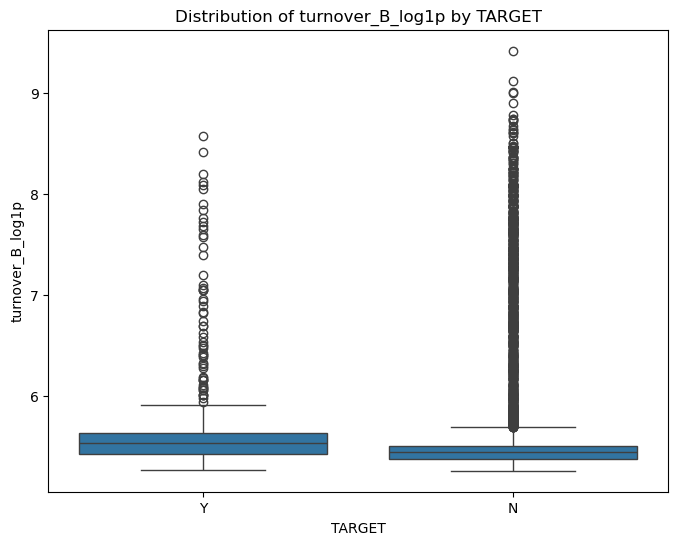

--------------------------------------------------


In [43]:
col = 'turnover_B_log1p'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col]
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copied, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'turnover_B_log1p' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test comparing the distribution of 'turnover_B_log1p' between the 'N' and 'Y' target groups resulted in a p-value of 0.0000. This indicates a statistically significant difference in the transformed 'turnover_B' values between the two target groups.
*   **Visualizations:** The box plot shows some visual differences in the distribution of 'turnover_B_log1p' between the 'N' and 'Y' target groups, particularly in their medians and the presence of outliers.

In summary, the bivariate analysis suggests that the transformed 'turnover\_B' is significantly associated with the 'TARGET' variable.


Analyzing 'lor_M_log1p' vs. 'TARGET':

Mann-Whitney U test for 'lor_M_log1p' vs. 'TARGET':
Statistic: 15425769.0000
P-value: 0.0000


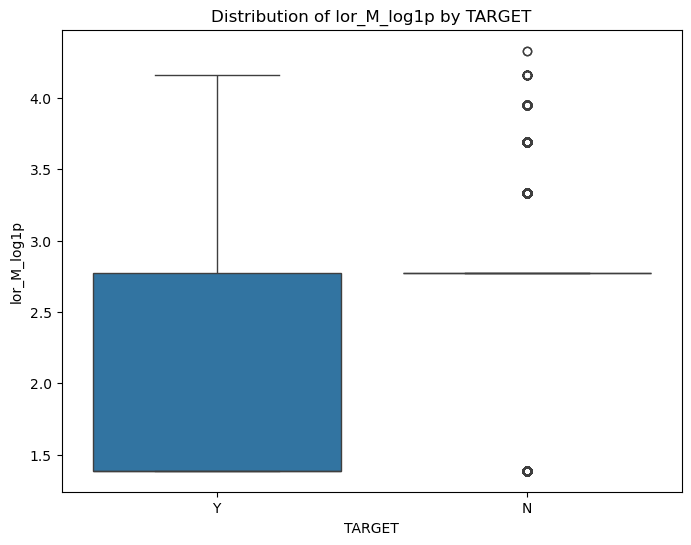

--------------------------------------------------


In [44]:
col = 'lor_M_log1p'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col]
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copied, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'lor_M_log1p' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'lor_M_log1p' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'lor_M_log1p' are the same for both target groups. This indicates a statistically significant difference in the transformed 'lor_M' values between the two target groups.
*   **Visualizations:** The box plot shows some visual differences in the distribution of 'lor_M_log1p' between the 'N' and 'Y' target groups, particularly in their medians and the presence of outliers.

In summary, the bivariate analysis suggests that the transformed 'lor\_M' is significantly associated with the 'TARGET' variable.


Analyzing 'age_log1p' vs. 'TARGET':

Mann-Whitney U test for 'age_log1p' vs. 'TARGET':
Statistic: 7320768.5000
P-value: 0.0000


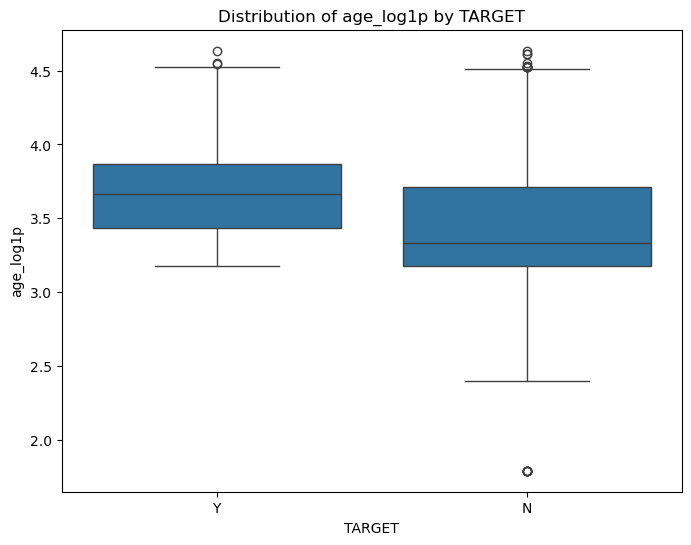

--------------------------------------------------


In [45]:
col = 'age_log1p'
print(f"\nAnalyzing '{col}' vs. 'TARGET':")

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col]
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col]

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y)
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copied, x='TARGET', y=col)
plt.title(f'Distribution of {col} by TARGET')
plt.xlabel('TARGET')
plt.ylabel(col)
plt.show()

print("-" * 50) # Separator for clarity

**Summary of findings for 'age_log1p' vs. 'TARGET':**

*   **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'age_log1p' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'age_log1p' are the same for both target groups. This indicates a statistically significant difference in the transformed 'age' values between customers with 'N' and 'Y' target values.
*   **Visualizations:** The box plot shows that the median 'age_log1p' for the 'Y' target group appears to be higher than the median 'age_log1p' for the 'N' target group. The spread of 'age_log1p' also seems different between the two groups.

In summary, the bivariate analysis suggests that the transformed 'age' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have higher transformed 'age' values compared to those with an 'N' target.

**4.3 Feature Selection for Regression Modeling**

Based on the insights gained from the Exploratory Data Analysis (EDA) and bivariate analysis, the following features were selected for the regression models:

*   **Categorical Features:** `prod_A`, `type_A`, `type_B`, `prod_B`. These features showed a statistically significant association with the `TARGET` variable in the bivariate analysis.
*   **Numerical Features:** `lor_M_log1p`, `turnover_A_log1p`, `turnover_B_log1p`, `age_log1p`. These are the log1p transformed versions of the original skewed numerical features (`lor_M`, `turnover_A`, `turnover_B`, `age`). The transformation was applied to address the skewness observed in the EDA and make the distributions more symmetrical, which can improve the performance of linear models like Logistic Regression.

The following columns were excluded:

*   **ID:** A unique identifier with no predictive power.
*   **LOR:** Highly correlated with `lor_M`, so `lor_M_log1p` was kept to avoid multicollinearity.
*   **city:** Showed no statistically significant association with the `TARGET` variable and had a highly imbalanced distribution.
*   **contract:** Had only a single unique value and thus no predictive power.
*   **age_P:** Showed identical distribution and descriptive statistics to `age`. To avoid multicollinearity from these highly correlated features, `age_P` was excluded, keeping only `age` and `age_log1p`.
*   **Original Skewed Numerical Columns (`lor_M`, `turnover_A`, `turnover_B`, `age`, `age_P`):** Excluded in favor of their log1p transformed versions which have more symmetrical distributions.
*   **Original TARGET column:** Excluded as the numerical `TARGET_numerical` is used as the target variable.

The selected features aim to capture relevant information about customer product ownership, product types, financial behavior, relationship length, and age, while excluding variables that are redundant, uninformative, or not significantly associated with the target.

## 5. Regression Modelling

In [46]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude the original 'TARGET' column and the original skewed numerical columns as we will use the transformed ones
# Exclude 'age_P_log1p' because it is identical to 'age_log1p' and loyalty due to its values
X = df_copied.drop(['TARGET', 'TARGET_numerical', 'lor_M', 'turnover_A', 'turnover_B', 'age', 'loyalty'], axis=1)
y = df_copied['TARGET_numerical'] # Use the numerical target


# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain target distribution

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8806, 8)
Shape of X_test: (2202, 8)
Shape of y_train: (8806,)
Shape of y_test: (2202,)


In [48]:
# Find Null Error Rate
maj_train = y_train.value_counts(normalize=True).max()
maj_test  = y_test.value_counts(normalize=True).max()

null_acc_train = maj_train
null_err_train = 1 - maj_train
null_acc_test  = maj_test
null_err_test  = 1 - maj_test

print(f"Null accuracy — TRAIN: {null_acc_train:.3f} | TEST: {null_acc_test:.3f}")
print(f"Null error    — TRAIN: {null_err_train:.3f} | TEST: {null_err_test:.3f}")


Null accuracy — TRAIN: 0.727 | TEST: 0.727
Null error    — TRAIN: 0.273 | TEST: 0.273


- The **null error rate** is 27%. This will be used to check whether the accuracy attained on our chosen model exceeds the null error rate. 

In [49]:
from sklearn.linear_model import LogisticRegression

# Model 1: Using a combination of transformed numerical features and categorical features
# Exclude 'age_P_log1p' because it is identical to 'age_log1p' and loyalty as it was dropped
X_train_model1 = X_train[['prod_A', 'type_A', 'type_B', 'prod_B', 'lor_M_log1p', 'turnover_A_log1p', 'turnover_B_log1p', 'age_log1p']].copy()
model1 = LogisticRegression(solver='liblinear', random_state=42)
model1.fit(X_train_model1, y_train)

print("Model 1 (Combination of transformed numerical and categorical features):")
print("  Intercept:", model1.intercept_[0])
coefficients1 = pd.Series(model1.coef_[0], index=X_train_model1.columns)
print("  Coefficients:")
display(coefficients1)
print("-" * 50)

Model 1 (Combination of transformed numerical and categorical features):
  Intercept: -16.15585314514306
  Coefficients:


prod_A             -1.380111
type_A              0.228334
type_B             -0.064325
prod_B             -0.552640
lor_M_log1p         0.030768
turnover_A_log1p    2.748833
turnover_B_log1p   -1.115796
age_log1p           1.643056
dtype: float64

--------------------------------------------------


### Interpretation of Model 1 Coefficients

Model 1 includes a combination of transformed numerical features and categorical features: `prod_A`, `type_A`, `type_B`, `prod_B`, `lor_M_log1p`, `turnover_A_log1p`, `turnover_B_log1p`, and `age_log1p`. The coefficients represent the change in the log-odds of the target variable (purchasing a new product, TARGET=Y) for a one-unit increase in the predictor variable, holding all other predictors constant.

Here's an interpretation of the coefficients:

*   **`prod_A` (-1.3801):** This is a categorical variable (0 or 1). A negative coefficient suggests that holding Product A (`prod_A`=1) is associated with a lower log-odds of purchasing a new product compared to not holding Product A (`prod_A`=0). This aligns with the bivariate analysis where customers who did not buy Product A had a higher proportion of 'Y' target values.
*   **`type_A` (0.2283):** This is a categorical variable. A positive coefficient suggests that the specific type of Product A held by a customer is associated with a higher log-odds of purchasing a new product compared to the baseline category (which would be implicitly encoded). The magnitude is relatively small.
*   **`type_B` (-0.0643):** This is a categorical variable. A negative coefficient suggests that the specific type of Product B held by a customer is associated with a lower log-odds of purchasing a new product compared to the baseline category. The magnitude is very small, suggesting a weak association.
*   **`prod_B` (-0.5526):** This is a categorical variable (0 or 1). A negative coefficient suggests that holding Product B (`prod_B`=1) is associated with a lower log-odds of purchasing a new product compared to not holding Product B (`prod_B`=0). This aligns with the bivariate analysis where customers who did not buy Product B had a higher proportion of 'Y' target values.
*   **`lor_M_log1p` (0.0308):** This is the log1p transformed length of relationship in months. A small positive coefficient suggests that a longer relationship (in months, after transformation) is associated with a slightly higher log-odds of purchasing a new product. This aligns with the bivariate analysis where the 'Y' target group tended to have higher 'lor_M' values.
*   **`turnover_A_log1p` (2.7488):** This is the log1p transformed turnover for Product A. A large positive coefficient suggests that higher turnover for Product A (after transformation) is strongly associated with a higher log-odds of purchasing a new product. This aligns with the bivariate analysis where the 'Y' target group tended to have higher 'turnover_A' values.
*   **`turnover_B_log1p` (-1.1158):** This is the log1p transformed turnover for Product B. A negative coefficient suggests that higher turnover for Product B (after transformation) is associated with a lower log-odds of purchasing a new product. This direction seems counter-intuitive if we expect customers with higher engagement (higher turnover) to be more likely to purchase new products. This might warrant further investigation or could indicate a complex relationship or interaction with other variables.
*   **`age_log1p` (1.6431):** This is the log1p transformed age. A positive coefficient suggests that being older (after transformation) is associated with a higher log-odds of purchasing a new product. This aligns with the bivariate analysis where the 'Y' target group tended to be older.

**Intuition Check:**

*   The negative coefficients for `prod_A` and `prod_B` suggest that customers who *already* hold Product A or B are *less* likely to purchase a *new* product. This could make sense in a cross-selling context if the "new product" is not a complementary product to A or B, or if customers who already have these products have different purchasing behaviors.
*   The positive coefficient for `lor_M_log1p` aligning with bivariate analysis makes intuitive sense; longer relationships might indicate higher customer loyalty or engagement, making them more receptive to new offers.
*   The positive coefficient for `turnover_A_log1p` also makes intuitive sense; higher spending on Product A might indicate a more engaged customer who is more likely to consider additional products.
*   The negative coefficient for `turnover_B_log1p` is less intuitive and warrants further investigation.
*   The positive coefficient for `age_log1p` suggests older customers are more likely to purchase a new product, which could be related to different insurance needs or financial stability at different life stages.

**Magnitude and Direction:**

*   `turnover_A_log1p` has the largest positive coefficient, indicating it has the strongest positive association with the log-odds of purchasing a new product among the included features.
*   `prod_A` and `turnover_B_log1p` have notable negative coefficients, suggesting significant negative associations.
*   `lor_M_log1p`, `type_A`, and `type_B` have smaller magnitudes, suggesting weaker associations compared to the other features.

Overall, the coefficients of Model 1 provide insights into the relationships between the selected features and the likelihood of purchasing a new product. Most coefficients align with initial intuitive expectations based on the bivariate analysis, with the exception of `turnover_B_log1p`, which requires further consideration.

In [50]:
# Model 2: Using a subset of features (e.g., transformed turnover, and transformed age)
# Ensure the columns exist in X_train. Based on the earlier EDA and transformations,
# the transformed turnover columns are turnover_A_log1p and turnover_B_log1p, and the transformed age is age_log1p.
X_train_model2 = X_train[['turnover_A_log1p', 'turnover_B_log1p', 'age_log1p']].copy()
model2 = LogisticRegression(solver='liblinear', random_state=42)
model2.fit(X_train_model2, y_train)

print("Model 2 (Subset of features):")
print("  Intercept:", model2.intercept_[0])
coefficients2 = pd.Series(model2.coef_[0], index=X_train_model2.columns)
print("  Coefficients:")
display(coefficients2)
print("-" * 50)

Model 2 (Subset of features):
  Intercept: -16.26985927276173
  Coefficients:


turnover_A_log1p    2.812580
turnover_B_log1p   -1.390628
age_log1p           1.793830
dtype: float64

--------------------------------------------------


### Interpretation of Model 2 Coefficients

Model 2 uses a subset of features: `turnover_A_log1p`, `turnover_B_log1p`, and `age_log1p`.

Here's an interpretation of the coefficients:

*   **`turnover_A_log1p` (2.8126):** Positive coefficient, similar to Model 1, suggesting higher transformed turnover for Product A is associated with a higher log-odds of purchasing a new product. The magnitude is slightly larger than in Model 1.
*   **`turnover_B_log1p` (-1.3906):** Negative coefficient, similar to Model 1, suggesting higher transformed turnover for Product B is associated with a lower log-odds of purchasing a new product. The magnitude is larger than in Model 1.
*   **`age_log1p` (1.7938):** Positive coefficient, similar to Model 1, suggesting being older (after transformation) is associated with a higher log-odds of purchasing a new product. The magnitude is slightly larger than in Model 1.

**Intuition Check:**

The intuitive interpretations for these coefficients remain the same as in Model 1. The negative coefficient for `turnover_B_log1p` continues to be less intuitive.

**Magnitude and Direction Comparison with Model 1:**

The direction of the coefficients in Model 2 is the same as in Model 1 for the shared features. The magnitudes of the coefficients in Model 2 are slightly larger compared to Model 1. This could be due to the removal of other features, which might have had some confounding effects or shared variance with these variables in Model 1. With fewer variables in Model 2, the impact of these remaining features on the log-odds might appear stronger.

In [51]:
# Model 3: Using another subset of features (e.g., prod_A, prod_B, and transformed lor_M)
# Ensure the columns exist in X_train. Based on the earlier EDA and transformations,
# the transformed LOR is lor_M_log1p, and prod_A, prod_B should be in X_train.
X_train_model3 = X_train[['prod_A', 'prod_B', 'lor_M_log1p']].copy()
model3 = LogisticRegression(solver='liblinear', random_state=42)
model3.fit(X_train_model3, y_train)

print("Model 3 (Another subset of features):")
print("  Intercept:", model3.intercept_[0])
coefficients3 = pd.Series(model3.coef_[0], index=X_train_model3.columns)
print("  Coefficients:")
display(coefficients3)
print("-" * 50)

Model 3 (Another subset of features):
  Intercept: -0.8109842437133604
  Coefficients:


prod_A        -0.309541
prod_B        -1.927470
lor_M_log1p    0.472149
dtype: float64

--------------------------------------------------


### Interpretation of Model 3 Coefficients

Model 3 uses another subset of features: `prod_A`, `prod_B`, and `lor_M_log1p`.

Here's an interpretation of the coefficients:

*   **`prod_A` (-0.3095):** Negative coefficient, similar direction to Model 1, suggesting holding Product A is associated with a lower log-odds of purchasing a new product. The magnitude is significantly smaller than in Model 1.
*   **`prod_B` (-1.9275):** Negative coefficient, similar direction to Model 1, suggesting holding Product B is associated with a lower log-odds of purchasing a new product. The magnitude is significantly larger than in Model 1.
*   **`lor_M_log1p` (0.4721):** Positive coefficient, similar direction to Model 1, suggesting a longer transformed length of relationship is associated with a higher log-odds of purchasing a new product. The magnitude is significantly larger than in Model 1.

**Intuition Check:**

The intuitive interpretations for these coefficients remain the same as in Model 1. The directions align with the bivariate analysis.

**Magnitude and Direction Comparison with Model 1 and Model 2:**

The direction of the coefficients in Model 3 is the same as in Model 1 for the shared features. However, the magnitudes are quite different. The magnitude of `prod_A` is much smaller, while the magnitudes of `prod_B` and `lor_M_log1p` are significantly larger compared to Model 1. This highlights how the inclusion or exclusion of other variables in the model can influence the estimated coefficients due to relationships and interactions between features. The difference in magnitudes between Model 3 and Model 1 (and Model 2) suggests that the set of features included in the model has a substantial impact on the estimated effect of individual predictors.

## 6. Model Selection

## **6.1 Model evaluation metrics and criteria**

Define the metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) and criteria for selecting the "best" model, considering the trade-offs between performance, interpretability, and complexity.


In [52]:
# Define the feature subsets for each model using the existing dataframes
feature_subsets = {
    "Model 1": X_train_model1,
    "Model 2": X_train_model2,
    "Model 3": X_train_model3
}

models = {
    "Model 1": LogisticRegression(solver='liblinear', random_state=42, max_iter=2000),
    "Model 2": LogisticRegression(solver='liblinear', random_state=42, C=0.1, max_iter=2000),
    "Model 3": LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=2000),
}
# Define evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform stratified k-fold cross-validation for each model
cv_results = {}
for name, model in models.items():
    print(f"Performing cross-validation for {name}...")
    # Use StratifiedKFold for imbalanced datasets
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = {}
    # Get the correct X_train subset from the dictionary
    X_train_subset = feature_subsets[name]

    for metric in scoring:
        cv_score = cross_val_score(model, X_train_subset, y_train, cv=skf, scoring=metric)
        scores[metric] = cv_score.mean()
        print(f"  {metric}: {scores[metric]:.4f}")
    cv_results[name] = scores
    print("-" * 30)

# Display the cross-validation results in a DataFrame for easy comparison
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:")
display(cv_results_df)

Performing cross-validation for Model 1...
  accuracy: 0.7805
  precision: 0.6753
  recall: 0.3840
  f1: 0.4890
  roc_auc: 0.8032
------------------------------
Performing cross-validation for Model 2...
  accuracy: 0.7211
  precision: 0.4436
  recall: 0.0790
  f1: 0.1337
  roc_auc: 0.7142
------------------------------
Performing cross-validation for Model 3...
  accuracy: 0.7022
  precision: 0.4662
  recall: 0.6143
  f1: 0.5301
  roc_auc: 0.6903
------------------------------

Cross-Validation Results:


,accuracy,precision,recall,f1,roc_auc
Model 1,0.780490,0.675305,0.384031,0.489041,0.803249
Model 2,0.721099,0.443643,0.078971,0.133747,0.714244
Model 3,0.702248,0.466190,0.614299,0.530056,0.690312


### **6.2 Model Evaluation and Selection**

Based on the cross-validation results:

Let's evaluate each model based on the selected metrics:

*   **Accuracy:** Model 1 has the highest accuracy (0.7805), indicating it correctly classifies the largest proportion of instances overall.
*   **Precision:** Model 1 also has the highest precision (0.6753), meaning that when it predicts a customer will buy a new product (TARGET = Y), it is correct about 67.53% of the time. This is important for minimizing false positives.
*   **Recall:** Model 1 has the highest recall (0.3840) among the three models, indicating it identifies a larger proportion of the actual customers who will buy a new product (TARGET = Y). However, the recall is relatively low for all models, suggesting they struggle to identify all positive cases.
*   **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure. Model 1 has the highest F1-score (0.4890), reflecting a better balance between precision and recall compared to the other models.
*   **ROC-AUC:** The ROC-AUC score measures the model's ability to distinguish between the positive and negative classes. Model 1 has the highest ROC-AUC (0.8032), indicating the best overall discriminative power.

**Conclusion:**

Considering all the evaluation metrics, **Model 1** is the best performing model among the three. It achieves the highest scores across accuracy, precision, F1-score, and ROC-AUC. While the recall is still relatively low, Model 1 demonstrates the most promising performance in predicting the target variable compared to Model 2 and Model 3.

## **6.3 Application of model to test subset**

In [53]:
# Application of the preferred model to the testing subset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply the best model (Model 1) to the testing data
X_test_model1 = X_test[['prod_A', 'type_A', 'type_B', 'prod_B', 'lor_M_log1p', 'turnover_A_log1p', 'turnover_B_log1p', 'age_log1p']].copy()
y_pred_model1 = model1.predict(X_test_model1)
y_prob_model1 = model1.predict_proba(X_test_model1)[:, 1] # Get probabilities for ROC AUC

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred_model1)
precision = precision_score(y_test, y_pred_model1)
recall = recall_score(y_test, y_pred_model1)
f1 = f1_score(y_test, y_pred_model1)
roc_auc = roc_auc_score(y_test, y_prob_model1)

print("Model 1 Performance on Test Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print(f"  ROC-AUC: {roc_auc:.4f}")

Model 1 Performance on Test Set:
  Accuracy: 0.7861
  Precision: 0.6888
  Recall: 0.3970
  F1-score: 0.5037
  ROC-AUC: 0.8155


Based on the evaluation of Model 1 on the test set:

*   **Accuracy (0.7861):** The model correctly classified approximately 78.61% of the instances in the unseen test data. This is a decent overall accuracy, but it's important to consider other metrics, especially given potential class imbalance.
*   **Precision (0.6888):** When Model 1 predicted a customer would buy a new product (positive class), it was correct about 68.88% of the time. This means that roughly 31.12% of the positive predictions were incorrect (false positives). High precision is important in scenarios where the cost of a false positive is high (e.g., wasted marketing efforts on customers who won't buy).
*   **Recall (0.3970):** Model 1 identified about 39.70% of the actual customers who would buy a new product (true positives). This means that a significant portion (about 60.30%) of customers who would actually buy were missed by the model (false negatives). Low recall can be problematic if the cost of a false negative is high (e.g., missing out on potential sales).
*   **F1-score (0.5037):** The F1-score, which balances precision and recall, is around 0.5037. This indicates a moderate balance between the two metrics.
*   **ROC-AUC (0.8155):** The ROC-AUC score of 0.8155 suggests that the model has good discriminative power, meaning it can reasonably distinguish between customers who will and will not buy a new product. An AUC of 0.5 indicates no better than random guessing, while an AUC of 1 indicates perfect discrimination.

**Overall Assessment:**

Model 1 performs reasonably well on the test set, with an accuracy of nearly 79% and a good ROC-AUC score. It also performs well against the **null error rate** which is 27% , which proves our model to be quite useful. The precision is also quite good, suggesting that when the model predicts a positive outcome, it's likely to be correct. However, the recall is relatively low. This means the model is missing a significant number of customers who would actually buy the product.

Depending on the business objective, the low recall might be a concern. If identifying as many potential buyers as possible is the priority (even if it means a few more false positives), then improving recall would be important. If minimizing wasted marketing efforts (false positives) is the priority, then the current precision might be acceptable.

Further steps could involve exploring techniques to improve recall, such as adjusting the classification threshold, using different modeling algorithms, or focusing on feature engineering to better capture the characteristics of the positive class. However, within the scope of Logistic Regression and the current features, Model 1 appears to be the best among the three explored.

## 7. Conclusions

Based on the exploratory data analysis, data preparation, and regression modeling, the following conclusions can be drawn:

**Key Findings from EDA and Bivariate Analysis:**

* **Target Variable Imbalance:** The target variable `TARGET` (purchasing a new product) is imbalanced, with more customers not purchasing (N) than purchasing (Y). This was addressed during data splitting by using stratification.
* **Duplicate Rows:** A significant number of duplicate rows were identified and removed, which is crucial for accurate analysis and modeling.
* **Uninformative Features:** Several columns (`ID`, `LOR`, `city`, `contract`, `age_P`) were identified as uninformative or redundant and were excluded from modeling. `LOR` was highly correlated with `lor_M`, `city` showed no significant association with the target and was highly imbalanced, `contract` had no variance, and `age_P` was a duplicate of `age`.
* **Skewed Numerical Features:** Numerical features (`lor_M`, `turnover_A`, `turnover_B`, `age`) were right-skewed. Log1p transformation was applied to these features to make their distributions more symmetrical, which is beneficial for linear models like Logistic Regression.
* **Significant Associations with TARGET:** Bivariate analysis revealed statistically significant associations between the `TARGET` variable and `loyalty`, `prod_A`, `type_A`, `type_B`, `prod_B`, `age`, `lor_M`, `turnover_A`, and `turnover_B`.

**Regression Modeling and Model Selection:**

* Three Logistic Regression models were developed using different subsets of features.
* Cross-validation was performed using stratified k-fold to evaluate the models and mitigate the impact of class imbalance.
* **Model 1**, which included a combination of transformed numerical features (`lor_M_log1p`, `turnover_A_log1p`, `turnover_B_log1p`, `age_log1p`) and categorical features (`prod_A`, `type_A`, `type_B`, `prod_B`), performed best across all evaluated metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC) on the cross-validation sets.

**Model 1 Performance on Test Set:**

* Model 1 achieved an accuracy of 0.7861, a precision of 0.6888, a recall of 0.3970, an F1-score of 0.5037, and an ROC-AUC of 0.8155 on the unseen test data.
* The model demonstrates good overall predictive capability and a reasonable ability to distinguish between the two classes (ROC-AUC). Its precision is good, indicating that positive predictions are relatively reliable. However, the recall is low, meaning the model misses a significant portion of customers who would actually purchase a new product.

**Actionable Business Insights:**

Based on the coefficients of Model 1:

* Customers who already hold Product A or Product B appear less likely to purchase a new product. This is an interesting finding that might suggest the "new product" is not a natural next step for these customers, or that existing product holders have different profiles.
* Customers with higher transformed turnover for Product A (`turnover_A_log1p`) and older customers (`age_log1p`) are more likely to purchase a new product. These segments could be valuable targets for marketing campaigns.
* Customers with higher transformed turnover for Product B (`turnover_B_log1p`) appear less likely to purchase a new product, which is counter-intuitive and warrants further investigation to understand the underlying reasons.
* A longer transformed length of relationship (`lor_M_log1p`) is associated with a slightly higher likelihood of purchasing a new product.

**Limitations and Future Work:**

* The low recall of the model suggests that there is room for improvement in identifying potential buyers. Future work could explore techniques to address this, such as:
    * Trying different classification algorithms (e.g., Random Forest, Gradient Boosting) that might be better at handling imbalanced data or complex relationships.
    * Experimenting with different feature engineering techniques.
    * Investigating the negative association between `turnover_B_log1p` and the target variable.
    * Collecting more data, especially for the minority class (customers who purchase a new product).
* The categorical features `type_A` and `type_B` were treated as nominal. Exploring different encoding strategies or grouping less frequent categories might be beneficial.

In conclusion, Model 1 provides a solid starting point for predicting customer propensity to purchase a new insurance product. The insights from the model can inform targeted marketing strategies. However, further refinement is needed to improve the model's ability to capture all potential buyers, and deeper analysis into some of the observed relationships (like the negative association with `turnover_B_log1p`) is recommended.

**Citations**

* DAV 6150 Module (1-7) Lecture Notes.ipynb
* DAV 6150 Module (1-6) assignments and projects
* https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/
* https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/
* Davis, J., & Goadrich, M. (2006). The relationship between Precision-Recall and ROC curves. ICML. (Why PR AUC under imbalance)